# Machine Learning - Group Project - Group 14




#Summary Report

**Authors:**: Mayur Agrawal, Tanaya Hingwe, Urvi Shrimali, Haris Shaikh, Jash Vaidya, Gutkeerath Sandhu, Darshita Babu.

##Abstract


The COVID-19 pandemic crippled global health systems. Serious respiratory illnesses are caused by the condition, and patients frequently need to be admitted to the intensive care unit ("ICU"). In this study, three different machine learning models were built and data from Hospital Sírio-Libanês, a hospital in São Paulo, Brazil, was studied to determine which model was the most successful at predicting whether a patient needs to be admitted to the intensive care unit.


##Pipeline

This project is divided into four steps:

1. Exploratory Data Analysis ("EDA")
2. Data Preparation
3. Implement Machine Learning Models
4. AI Fairness 360 Toolkit ("AIF360") Implementation

**1. EDA:** For data preparation and to have a general grasp of the dataset's contents, we went over it. The amount of entries, columns, data types, missing values, and any potential biases or imbalances within the dataset were among the fundamental features of the data that we found.

**2. Data Preparation:** We balanced the goal variable, ICU admission, eliminated missing values, and changed the data types of many columns. To impute missing values, we put a novel algorithm into practice. Strategies from the last observation carried forward and the following observation carried backward are combined by the algorithm. The original dataset has a remark indicating that a patient with missing values is clinically stable, suggesting that data from the next or previous entry can be carried over into the missing window. This is why the missing not at random ("MNAR") strategy was used.

**3. Implement Machine Learning Models:** Determining whether a patient requires admission to the ICU is a binary classification problem. Accordingly, we selected machine learning models appropriate for binary classification: K-Nearest Neighbors, Random Forest, and Support Vector Machine. After reviewing and cleaning the data, we split it into training and test sets, then trained each model and evaluated its performance with the test dataset.

**4. AIF360:** AIF360 is an open-source toolkit developed by IBM to detect and mitigate bias and discrimination in machine learning projects. However, the applicability of AIF360 to this dataset is limited. The data were anonymized, and characteristics like gender and age, which are present in the dataset and might be considered 'bias' in other contexts, were deemed scientifically valid metrics for health data.

##Observations
We identified Random Forest as the most effective model for predicting ICU admission based on health sign data. Health care professionals can leverage this work to carry out high-level organizational decisions, such as determining the number of staff, beds, ventilators, etc., needed, based on the health signs of COVID-19 patients.

# Task 1 - Exploratory Data Analysis
---

In [90]:
# import analysis packages and read data from excel file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report


data_path = '/content/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'
data = pd.read_excel('/content/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')

# display first several records
data.head(5)


PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1          60th       0   
1                         0            1          60th       0   
2                         0            1          60th       0   
3                         0            1          60th       0   
4                         0            1          60th       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  ...  \
0                 0.0                 1.0                 1.0  ...   
1                 0.0                 1.0                 1.0  ...   
2                 0.0                 1.0                 1.0  ...   
3                 0.0                 1.0                 1.0  ...   
4                 0.0                 1.0                 1.0  ...   

   TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  BLOODPRESSURE_DIASTOLIC_DIFF_REL  \
0         -1.000000               -1.000000                         -1.000000   
1         -1.000000               -1.000000                         -1.000000   
2               NaN                     NaN                               NaN   
3         -1.000000               -1.000000                               NaN   
4         -0.238095               -0.818182                         -0.389967   

   BLOODPRESSURE_SISTOLIC_DIFF_REL  HEART_RATE_DIFF_REL  \
0                        -1.000000            -1.000000   
1                        -1.000000            -1.000000   
2                              NaN                  NaN   
3                              NaN                  NaN   
4                         0.407558            -0.230462   

   RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  \
0                  -1.000000             -1.000000   
1                  -1.000000             -1.000000   
2                        NaN                   NaN   
3                        NaN             -1.000000   
4                   0.096774             -0.242282   

   OXYGEN_SATURATION_DIFF_REL    WINDOW  ICU  
0                   -1.000000       0-2    0  
1                   -1.000000       2-4    0  
2                         NaN       4-6    0  
3                   -1.000000      6-12    0  
4                   -0.814433  ABOVE_12    1  

[5 rows x 231 columns]

###Identify data dimensions

In [91]:
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")

Number of Rows: 1925
Number of Columns: 231


In [92]:
# See all columns
data.columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=231)

###Identify variable types

In [93]:
data.dtypes

PATIENT_VISIT_IDENTIFIER        int64
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 231, dtype: object

In [94]:
dtype_counts = data.dtypes.value_counts()
display(dtype_counts)

float64    225
int64        4
object       2
dtype: int64

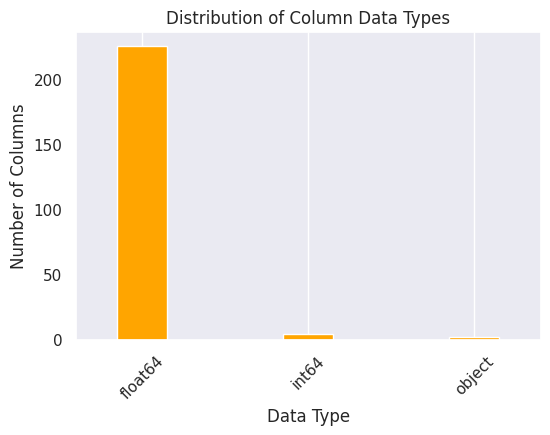

In [95]:
# most columns are float64, four are int64, and two are object/string type

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
dtype_counts.plot(kind='bar', color='orange',width = 0.3)
plt.title('Distribution of Column Data Types')
plt.ylabel('Number of Columns')
plt.xlabel('Data Type')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

###Summary statistics

In [96]:
# get summary statistics like mean, median, mode
data.describe()


PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65       GENDER  DISEASE GROUPING 1  \
count               1925.000000  1925.000000  1925.000000         1920.000000   
mean                 192.000000     0.467532     0.368831            0.108333   
std                  111.168431     0.499074     0.482613            0.310882   
min                    0.000000     0.000000     0.000000            0.000000   
25%                   96.000000     0.000000     0.000000            0.000000   
50%                  192.000000     0.000000     0.000000            0.000000   
75%                  288.000000     1.000000     1.000000            0.000000   
max                  384.000000     1.000000     1.000000            1.000000   

       DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
count         1920.000000         1920.000000         1920.000000   
mean             0.028125            0.097917            0.019792   
std              0.165373            0.297279            0.139320   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       DISEASE GROUPING 5  DISEASE GROUPING 6          HTN  ...  \
count         1920.000000         1920.000000  1920.000000  ...   
mean             0.128125            0.046875     0.213021  ...   
std              0.334316            0.211426     0.409549  ...   
min              0.000000            0.000000     0.000000  ...   
25%              0.000000            0.000000     0.000000  ...   
50%              0.000000            0.000000     0.000000  ...   
75%              0.000000            0.000000     0.000000  ...   
max              1.000000            1.000000     1.000000  ...   

       RESPIRATORY_RATE_DIFF  TEMPERATURE_DIFF  OXYGEN_SATURATION_DIFF  \
count            1177.000000       1231.000000             1239.000000   
mean               -0.703683         -0.770338               -0.887196   
std                 0.482097          0.319001                0.296147   
min                -1.000000         -1.000000               -1.000000   
25%                -1.000000         -1.000000               -1.000000   
50%                -1.000000         -0.976190               -0.979798   
75%                -0.647059         -0.595238               -0.878788   
max                 1.000000          1.000000                1.000000   

       BLOODPRESSURE_DIASTOLIC_DIFF_REL  BLOODPRESSURE_SISTOLIC_DIFF_REL  \
count                       1240.000000                      1240.000000   
mean                          -0.786997                        -0.715950   
std                            0.324754                         0.419103   
min                           -1.000000                        -1.000000   
25%                           -1.000000                        -1.000000   
50%                           -1.000000                        -0.984944   
75%                           -0.645482                        -0.522176   
max                            1.000000                         1.000000   

       HEART_RATE_DIFF_REL  RESPIRATORY_RATE_DIFF_REL  TEMPERATURE_DIFF_REL  \
count          1240.000000                1177.000000           1231.000000   
mean             -0.817800                  -0.719147             -0.771327   
std               0.270217                   0.446600              0.317694   
min              -1.000000                  -1.000000             -1.000000   
25%              -1.000000                  -1.000000             -1.000000   
50%              -0.989822                  -1.000000             -0.975924   
75%              -0.662529                  -0.634409             -0.594677   
max               1.000000                   1.000000              

###Analysis
- Any record where the window is greater than 12 cannot be used for modeling.
- If the patient is already in the ICU, their data cannot be used for modeling
- Each patient was assigned a unique identifier 0-384. Each patient was evaluated for health signs five times. That is why each patient has five records (1925/385 = 5). Each record will have a different window value.
- 46.8% of patients are above 65 years old
- Disease Grouping 1 - 6 are actually binary values. Should probably be converted to binary, instead of float/int.
- A lot of counts are lower than 1925, indicating missing values.



###Identify and analyze missing values

<Axes: >

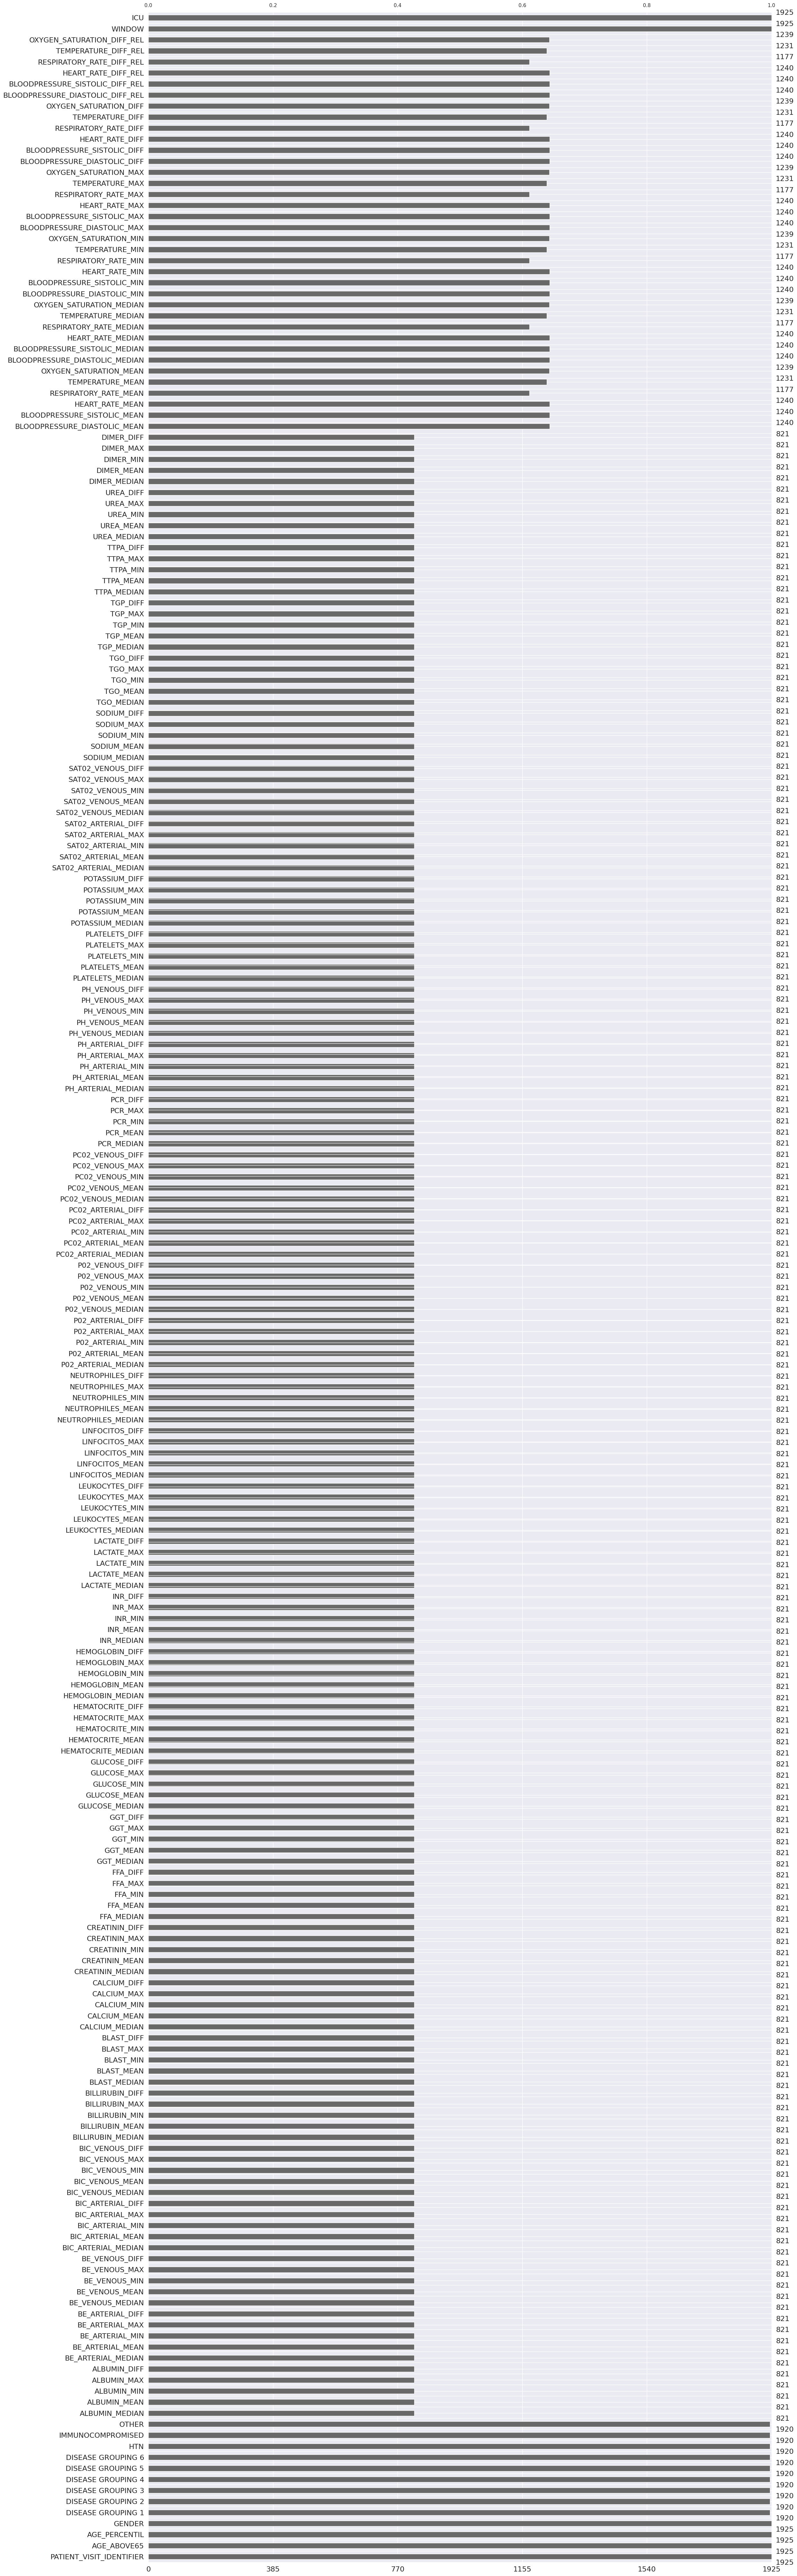

In [97]:
import missingno as msno
%matplotlib inline
msno.bar(data)

In [98]:
# Purpose of this code is to identify columns to consider dropping

# Calculate percentage of missing data for each feature
percent_of_missing_data_in_each_feature = data.isnull().mean() * 100
num_columns_to_drop = 0

# Display columns that are missing more than 50% of their data
print("////////////////////////////////////////////////////////////////// ")
for index, (feature, percent) in enumerate (percent_of_missing_data_in_each_feature.items()):
  if percent > 50:
    num_columns_to_drop += 1
    print(f"{index}. {feature} is missing {percent:.2f}% of its values")

print(f"\n Total number of columns to drop: {num_columns_to_drop}")


////////////////////////////////////////////////////////////////// 
13. ALBUMIN_MEDIAN is missing 57.35% of its values
14. ALBUMIN_MEAN is missing 57.35% of its values
15. ALBUMIN_MIN is missing 57.35% of its values
16. ALBUMIN_MAX is missing 57.35% of its values
17. ALBUMIN_DIFF is missing 57.35% of its values
18. BE_ARTERIAL_MEDIAN is missing 57.35% of its values
19. BE_ARTERIAL_MEAN is missing 57.35% of its values
20. BE_ARTERIAL_MIN is missing 57.35% of its values
21. BE_ARTERIAL_MAX is missing 57.35% of its values
22. BE_ARTERIAL_DIFF is missing 57.35% of its values
23. BE_VENOUS_MEDIAN is missing 57.35% of its values
24. BE_VENOUS_MEAN is missing 57.35% of its values
25. BE_VENOUS_MIN is missing 57.35% of its values
26. BE_VENOUS_MAX is missing 57.35% of its values
27. BE_VENOUS_DIFF is missing 57.35% of its values
28. BIC_ARTERIAL_MEDIAN is missing 57.35% of its values
29. BIC_ARTERIAL_MEAN is missing 57.35% of its values
30. BIC_ARTERIAL_MIN is missing 57.35% of its values
31. 

Simple conclusion: drop columns 13 - 192

###Analysis
- 180 features are missing greater than 50% of their values. Inputation might not be a sensible option. Consider dropping these columns?
- The data set is missing a significant amount of data. We only have approximately 49.6% of all possible data. Only six columns of the 231 columns are not missing values. Unsure of the reason for now.

##Visualizations

###Gender

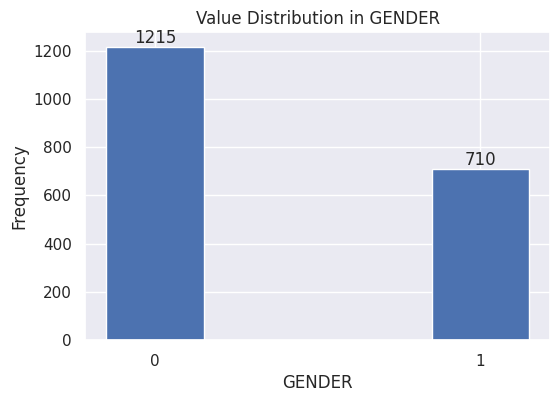

In [99]:


def extract_age_from_string(age_string):
    # Function to extract the numeric part of the age string
    age = int(''.join(filter(str.isdigit, age_string)))
    return age

def univariate_exploration(data, column_name):
    if column_name == 'GENDER':
        if data[column_name].dtype == 'int64' or data[column_name].dtype == 'float64':
            # If the column contains numerical data, create a histogram
            counts = data[column_name].value_counts()
            plt.figure(figsize=(6, 4))
            plt.bar(counts.index, counts.values, width=0.3)
            plt.xticks([0, 1], ['0', '1'])
            plt.xlabel(column_name)
            plt.ylabel('Frequency')
            plt.title(f'Value Distribution in {column_name}')

            # Add data counts as annotations on top of the bars
            for x, y in zip(counts.index, counts.values):
                plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=12)

            plt.show()
    if column_name == 'AGE_PERCENTIL':
        if data[column_name].dtype == 'object':
            # If the column contains strings, extract and convert to numeric values
            data[column_name] = data[column_name].apply(extract_age_from_string)

        if data[column_name].dtype == 'int64' or data[column_name].dtype == 'float64':
            # Create a histogram for the numeric age data
            plt.hist(data[column_name], bins=10)  # Adjust the number of bins as needed
            plt.xlabel('Age')
            plt.ylabel('Frequency')
            plt.title(f'Age Distribution in {column_name}')
            plt.show()

# Example usage
univariate_exploration(data, 'GENDER')




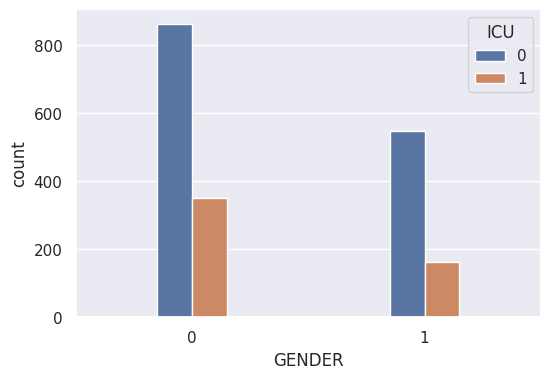

In [100]:
# GENDER
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="GENDER", hue="ICU", data=data, width= 0.3)


###Age Above 65

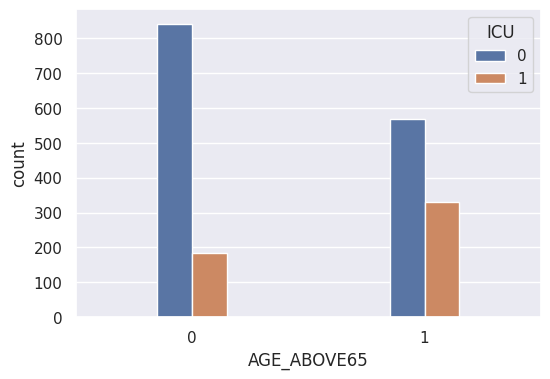

In [101]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="AGE_ABOVE65", hue="ICU", data=data,width=0.3)

###Age Percentile

<Axes: >

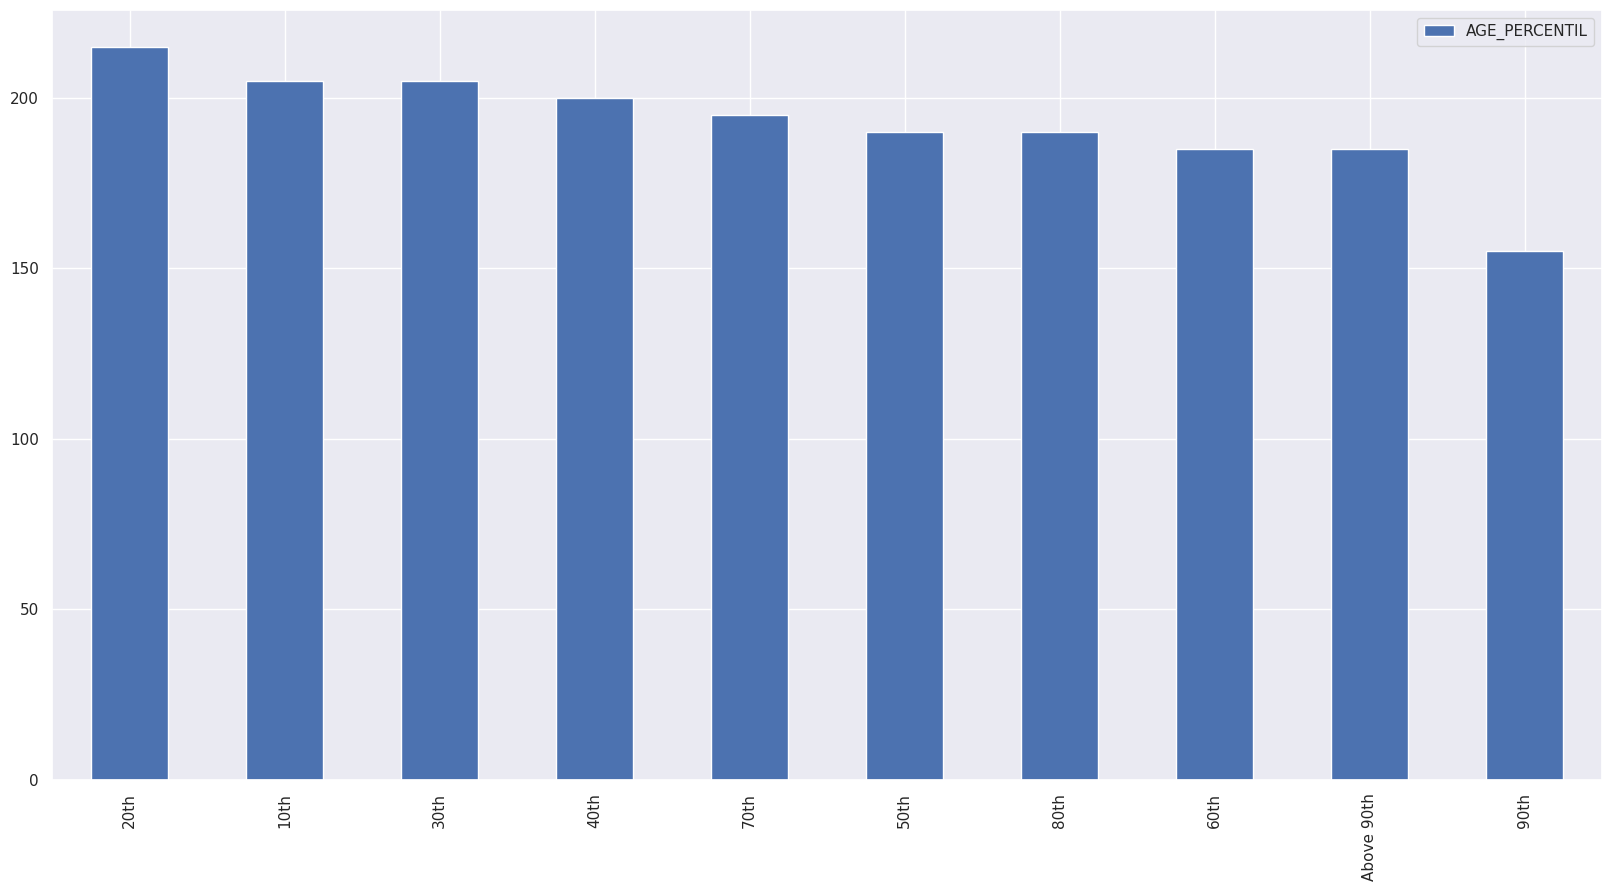

In [102]:
pd.DataFrame(data['AGE_PERCENTIL'].value_counts()).plot(kind='bar', figsize=(20,10))

###Gender Split

###Disease Groupings

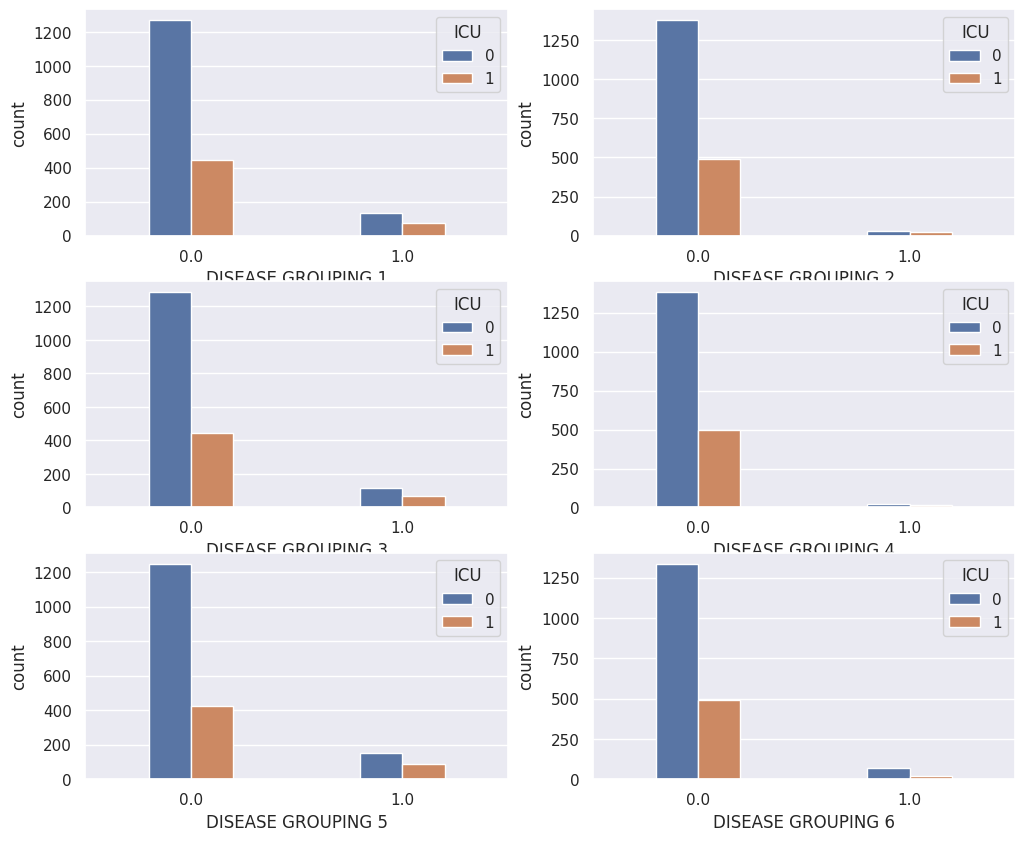

<Figure size 200x400 with 0 Axes>

<Figure size 200x400 with 0 Axes>

<Figure size 200x400 with 0 Axes>

<Figure size 200x400 with 0 Axes>

<Figure size 200x400 with 0 Axes>

<Figure size 200x400 with 0 Axes>

In [103]:
disease_grp = ['DISEASE GROUPING 1','DISEASE GROUPING 2','DISEASE GROUPING 3',
               'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6']

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(12,10))
col = 0

for i in range(len(disease_grp)):
  plt.figure(figsize=(2, 4))
  sns.countplot(x=disease_grp[i], hue="ICU", data=data, ax = axes[int((i)/2)][col], width = 0.4)
  col = (col+1) % 2

###Hypertension

<Axes: xlabel='HTN', ylabel='count'>

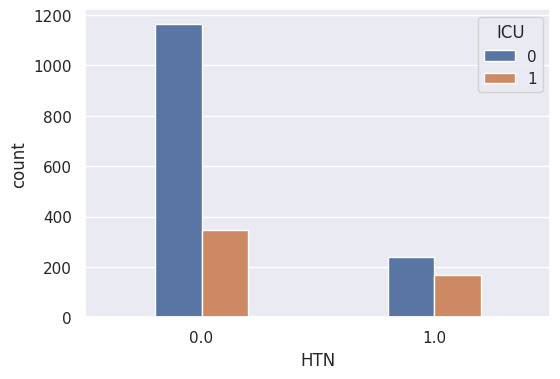

In [104]:
plt.figure(figsize=(6, 4))
sns.countplot(x="HTN", hue="ICU", data=data, width=0.4)



###Immunocompromised

<Axes: xlabel='IMMUNOCOMPROMISED', ylabel='count'>

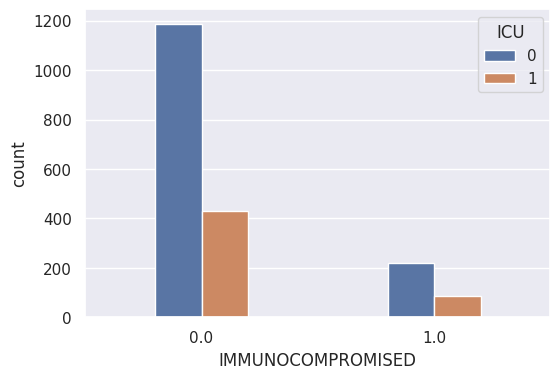

In [105]:
plt.figure(figsize=(6, 4))
sns.countplot(x="IMMUNOCOMPROMISED", hue="ICU", data=data,width=0.4)

## Immunocompromised or non-immunocompromised does not make a significant difference, the distribution
## looks similar for both, we cannot make any claims as the people with some immunocompromised conditions
## are fewer than ones with such condition.

###Other

<Axes: xlabel='OTHER', ylabel='count'>

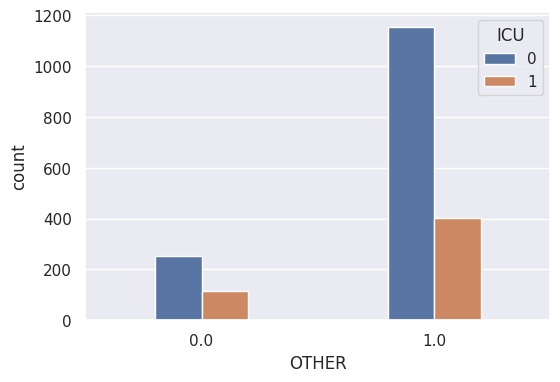

In [106]:
plt.figure(figsize=(6, 4))
sns.countplot(x="OTHER", hue="ICU", data=data, width = 0.4)

###ICU admissions proportion according to age percentile

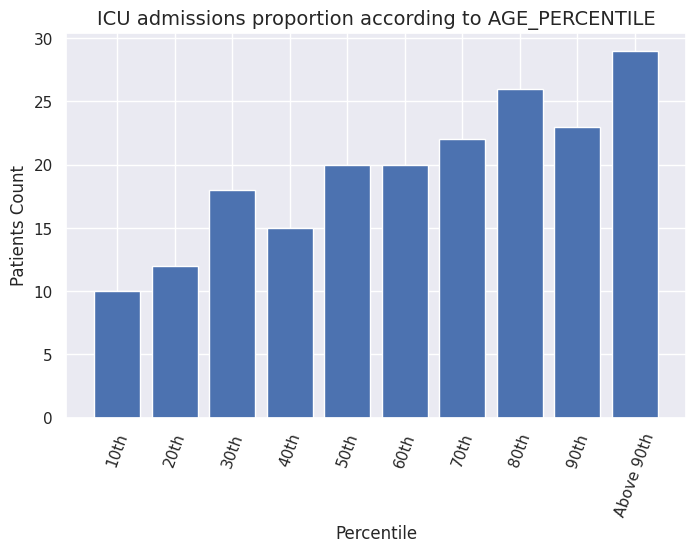

In [107]:
# proportion of patients admitted/ not admitted to ICU
ICU_prop = data[data['WINDOW'] == 'ABOVE_12']
#group by ICU admission
ICU_prop_main = ICU_prop.groupby('ICU')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()

#Age distribution of patients(percentiles) according to ICU admissions
AGE_prop_percentil = ICU_prop[ICU_prop['ICU'] == 1]
AGE_prop_percentil = AGE_prop_percentil.groupby('AGE_PERCENTIL')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()
AGE_prop_percentil.head()
plt.figure(figsize=(8,5))
plt.bar(AGE_prop_percentil["AGE_PERCENTIL"],AGE_prop_percentil["PATIENT_VISIT_IDENTIFIER"])
plt.xticks(rotation = 70)
plt.ylabel("Patients Count")
plt.xlabel("Percentile")
plt.title('ICU admissions proportion according to AGE_PERCENTILE', fontdict= {'fontsize' : 14})
plt.show()


###Density Plots

<Figure size 640x480 with 0 Axes>

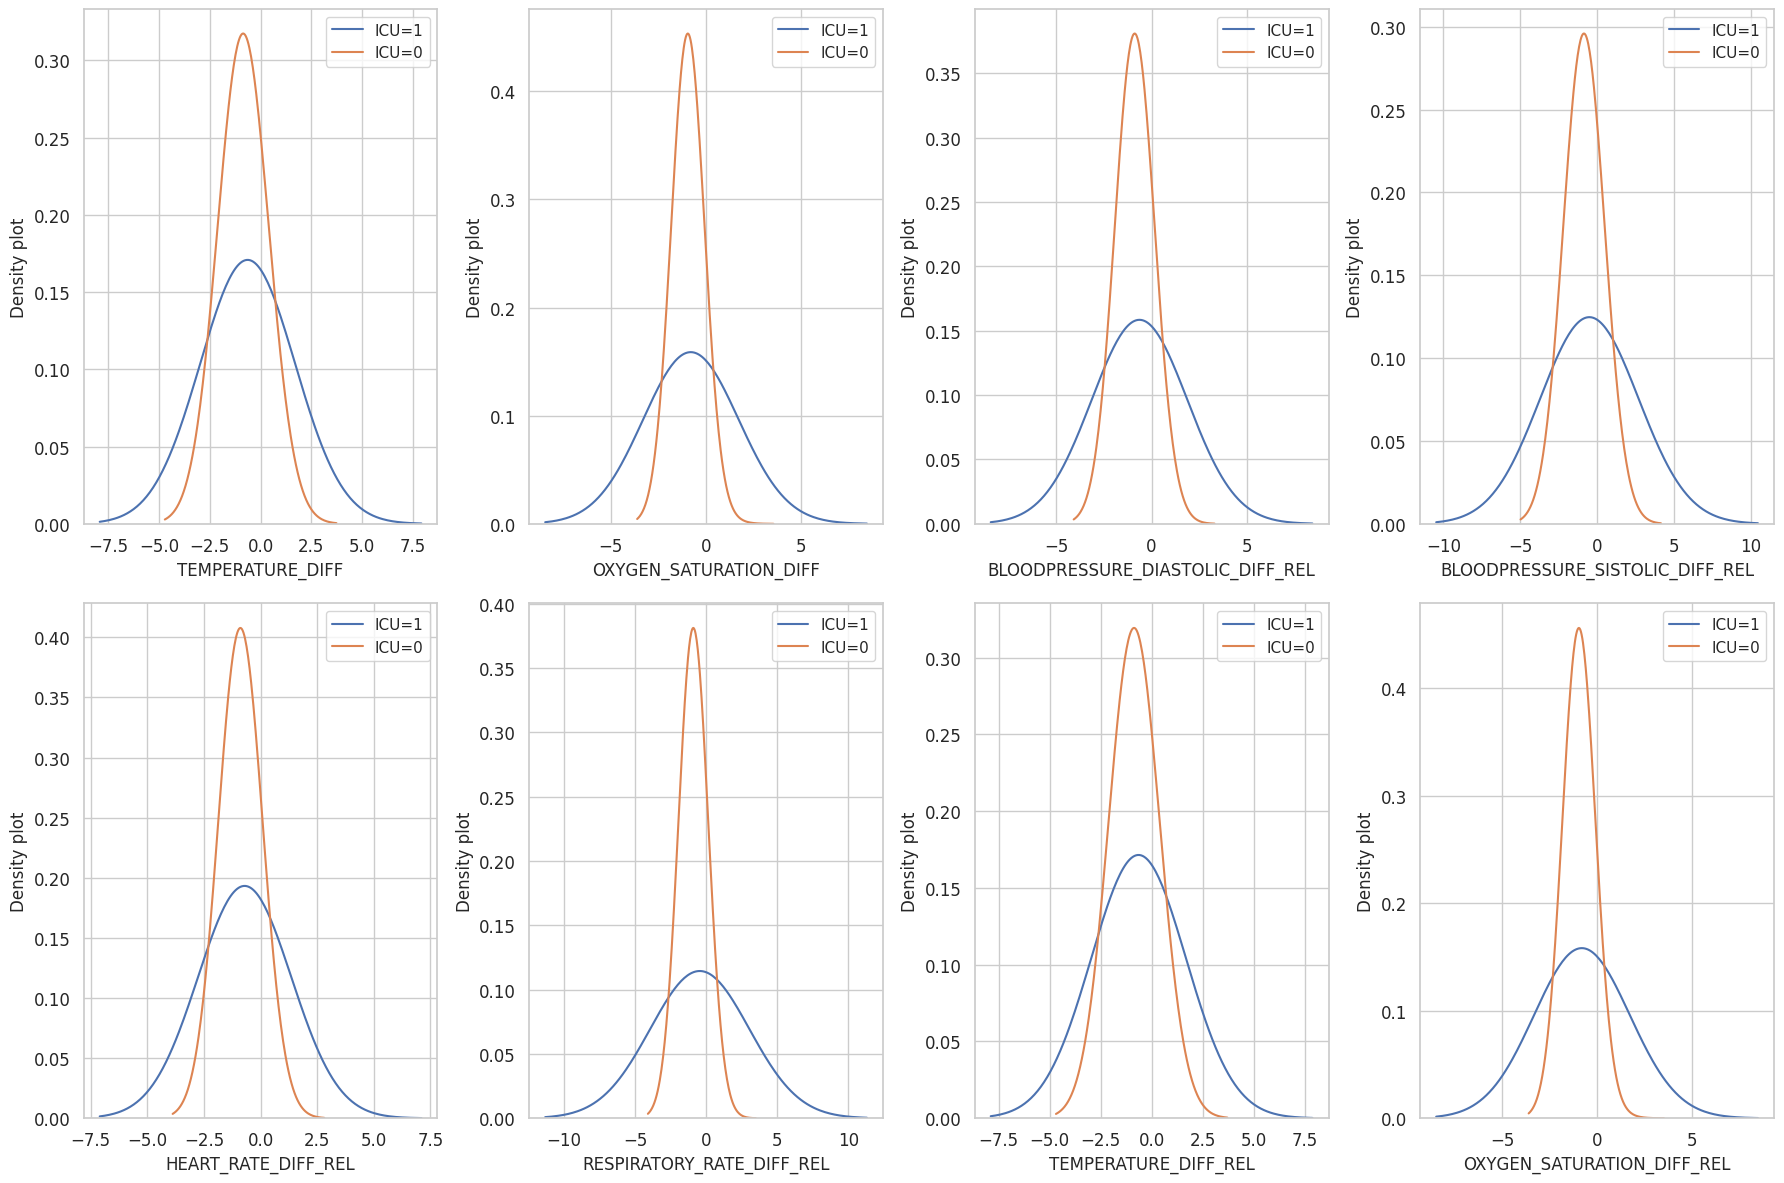

<Figure size 640x480 with 0 Axes>

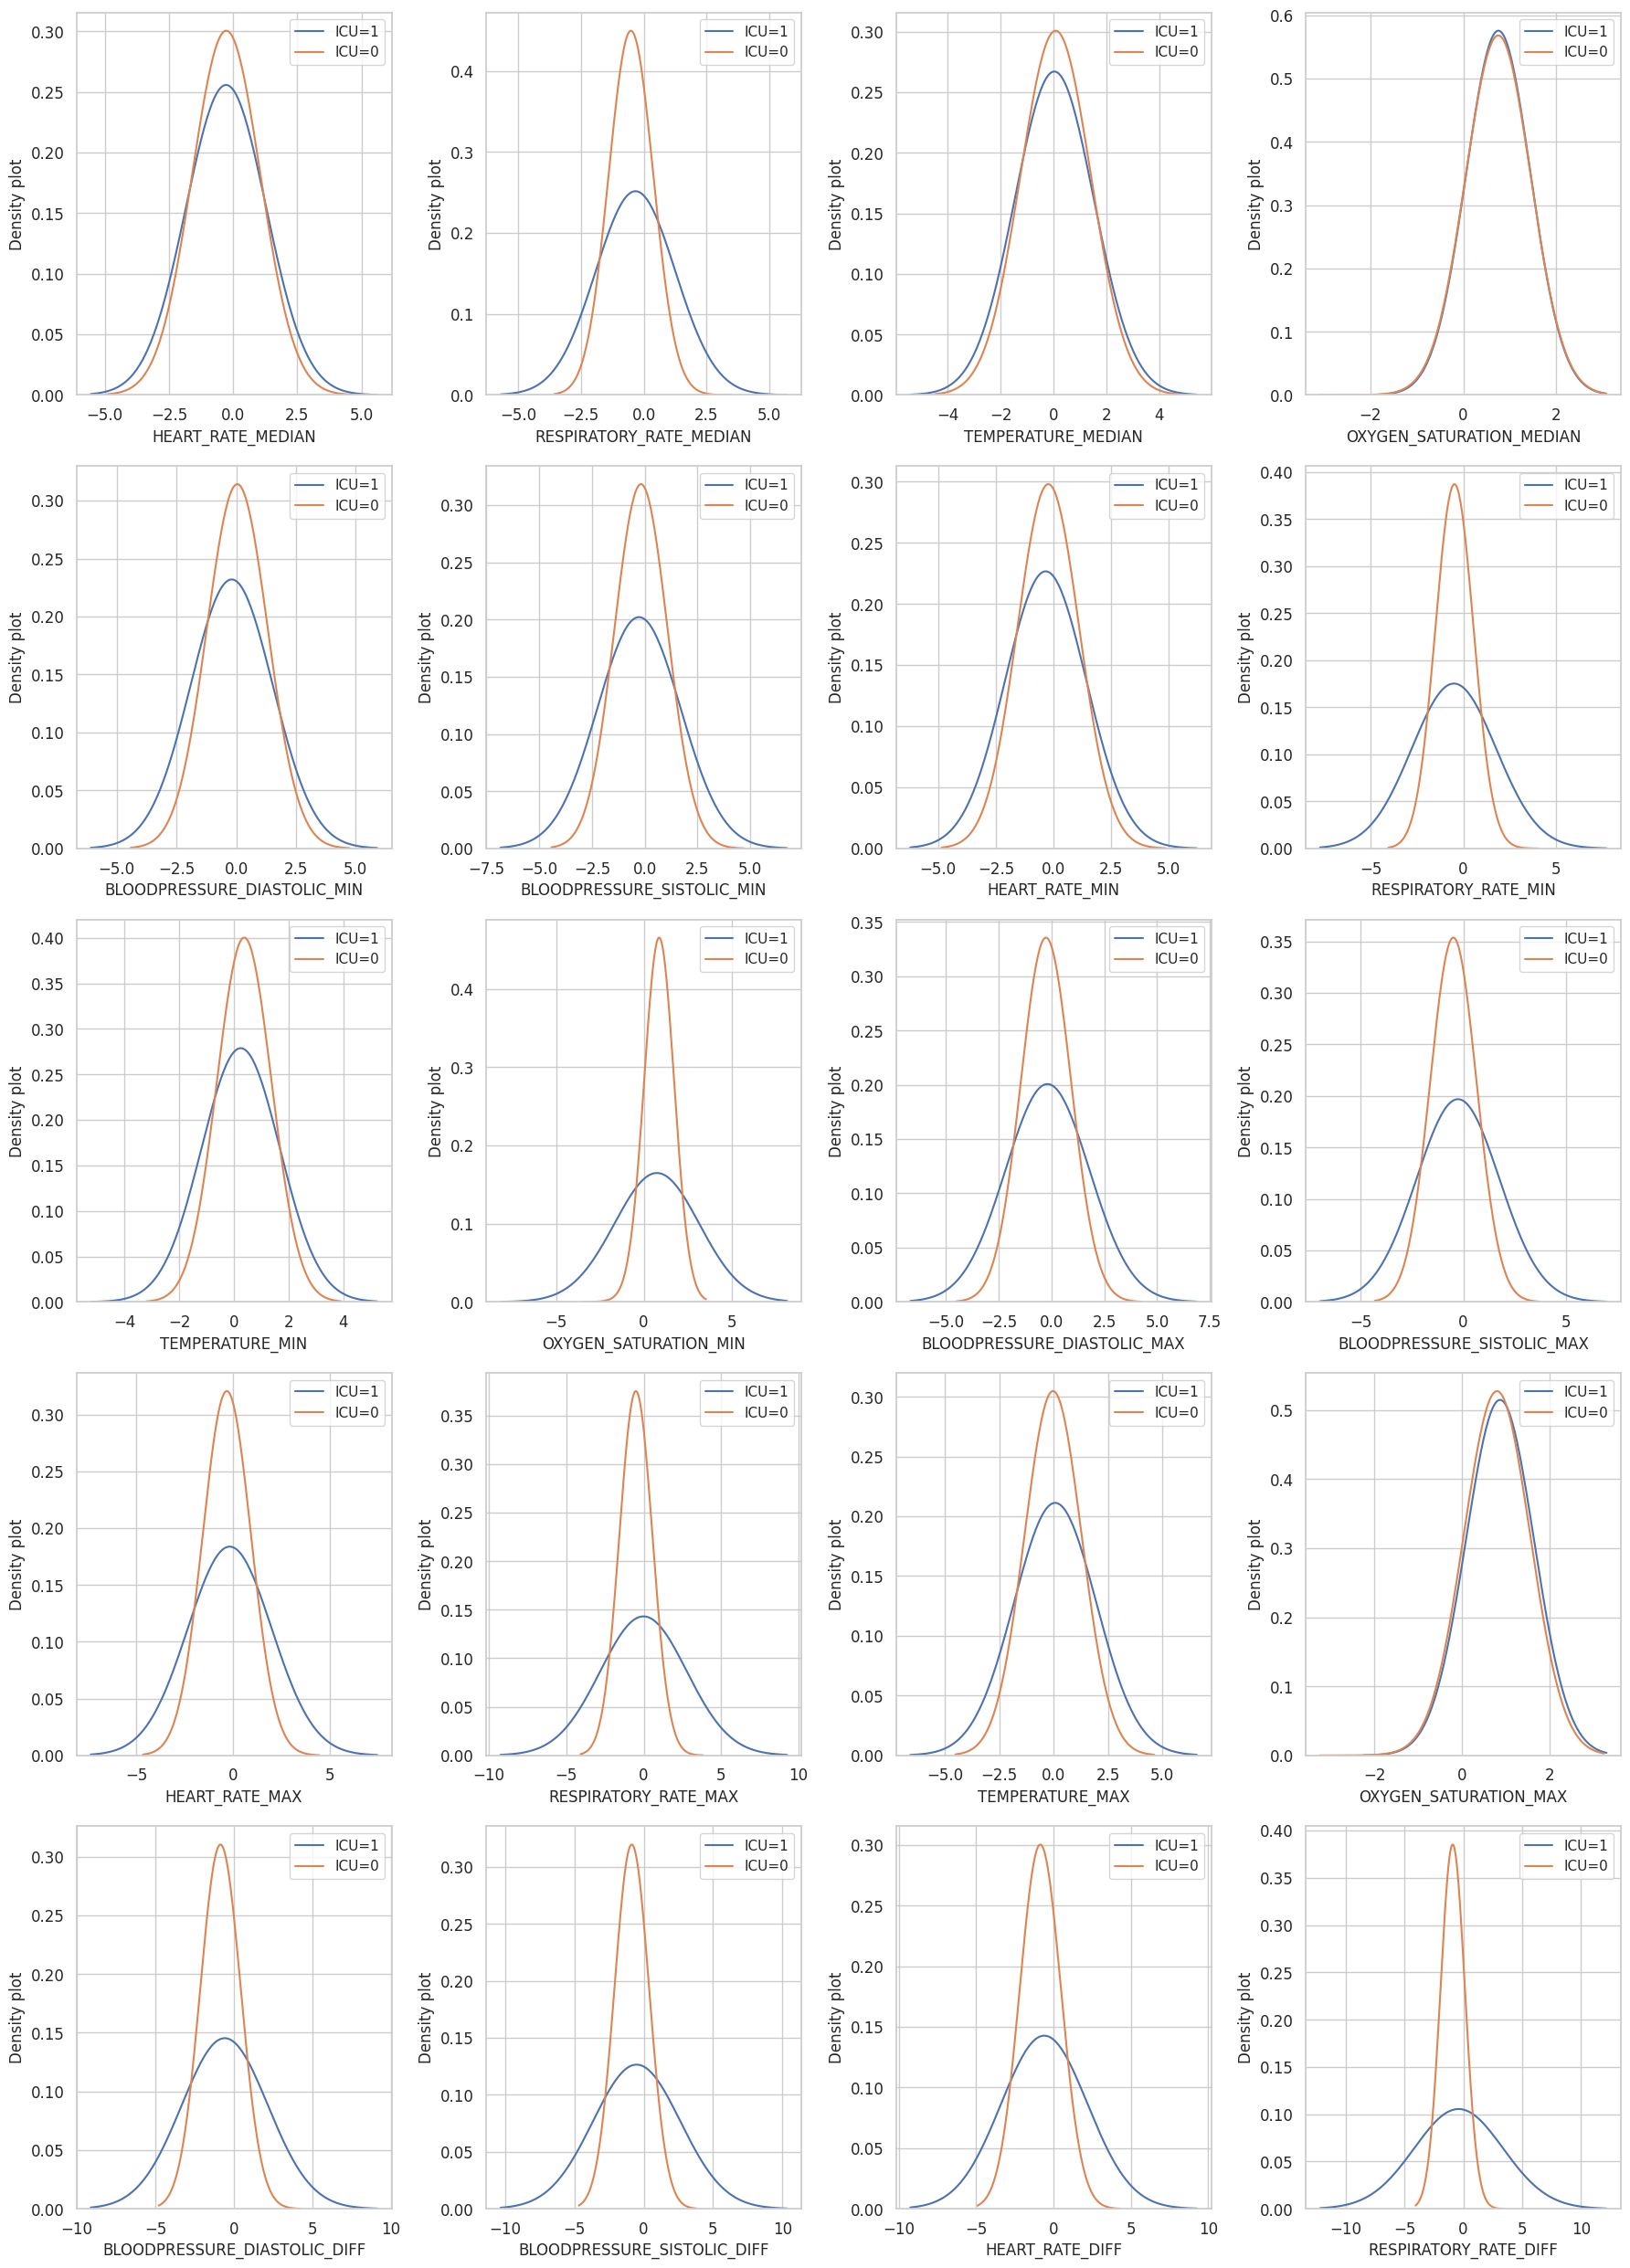

<Figure size 640x480 with 0 Axes>

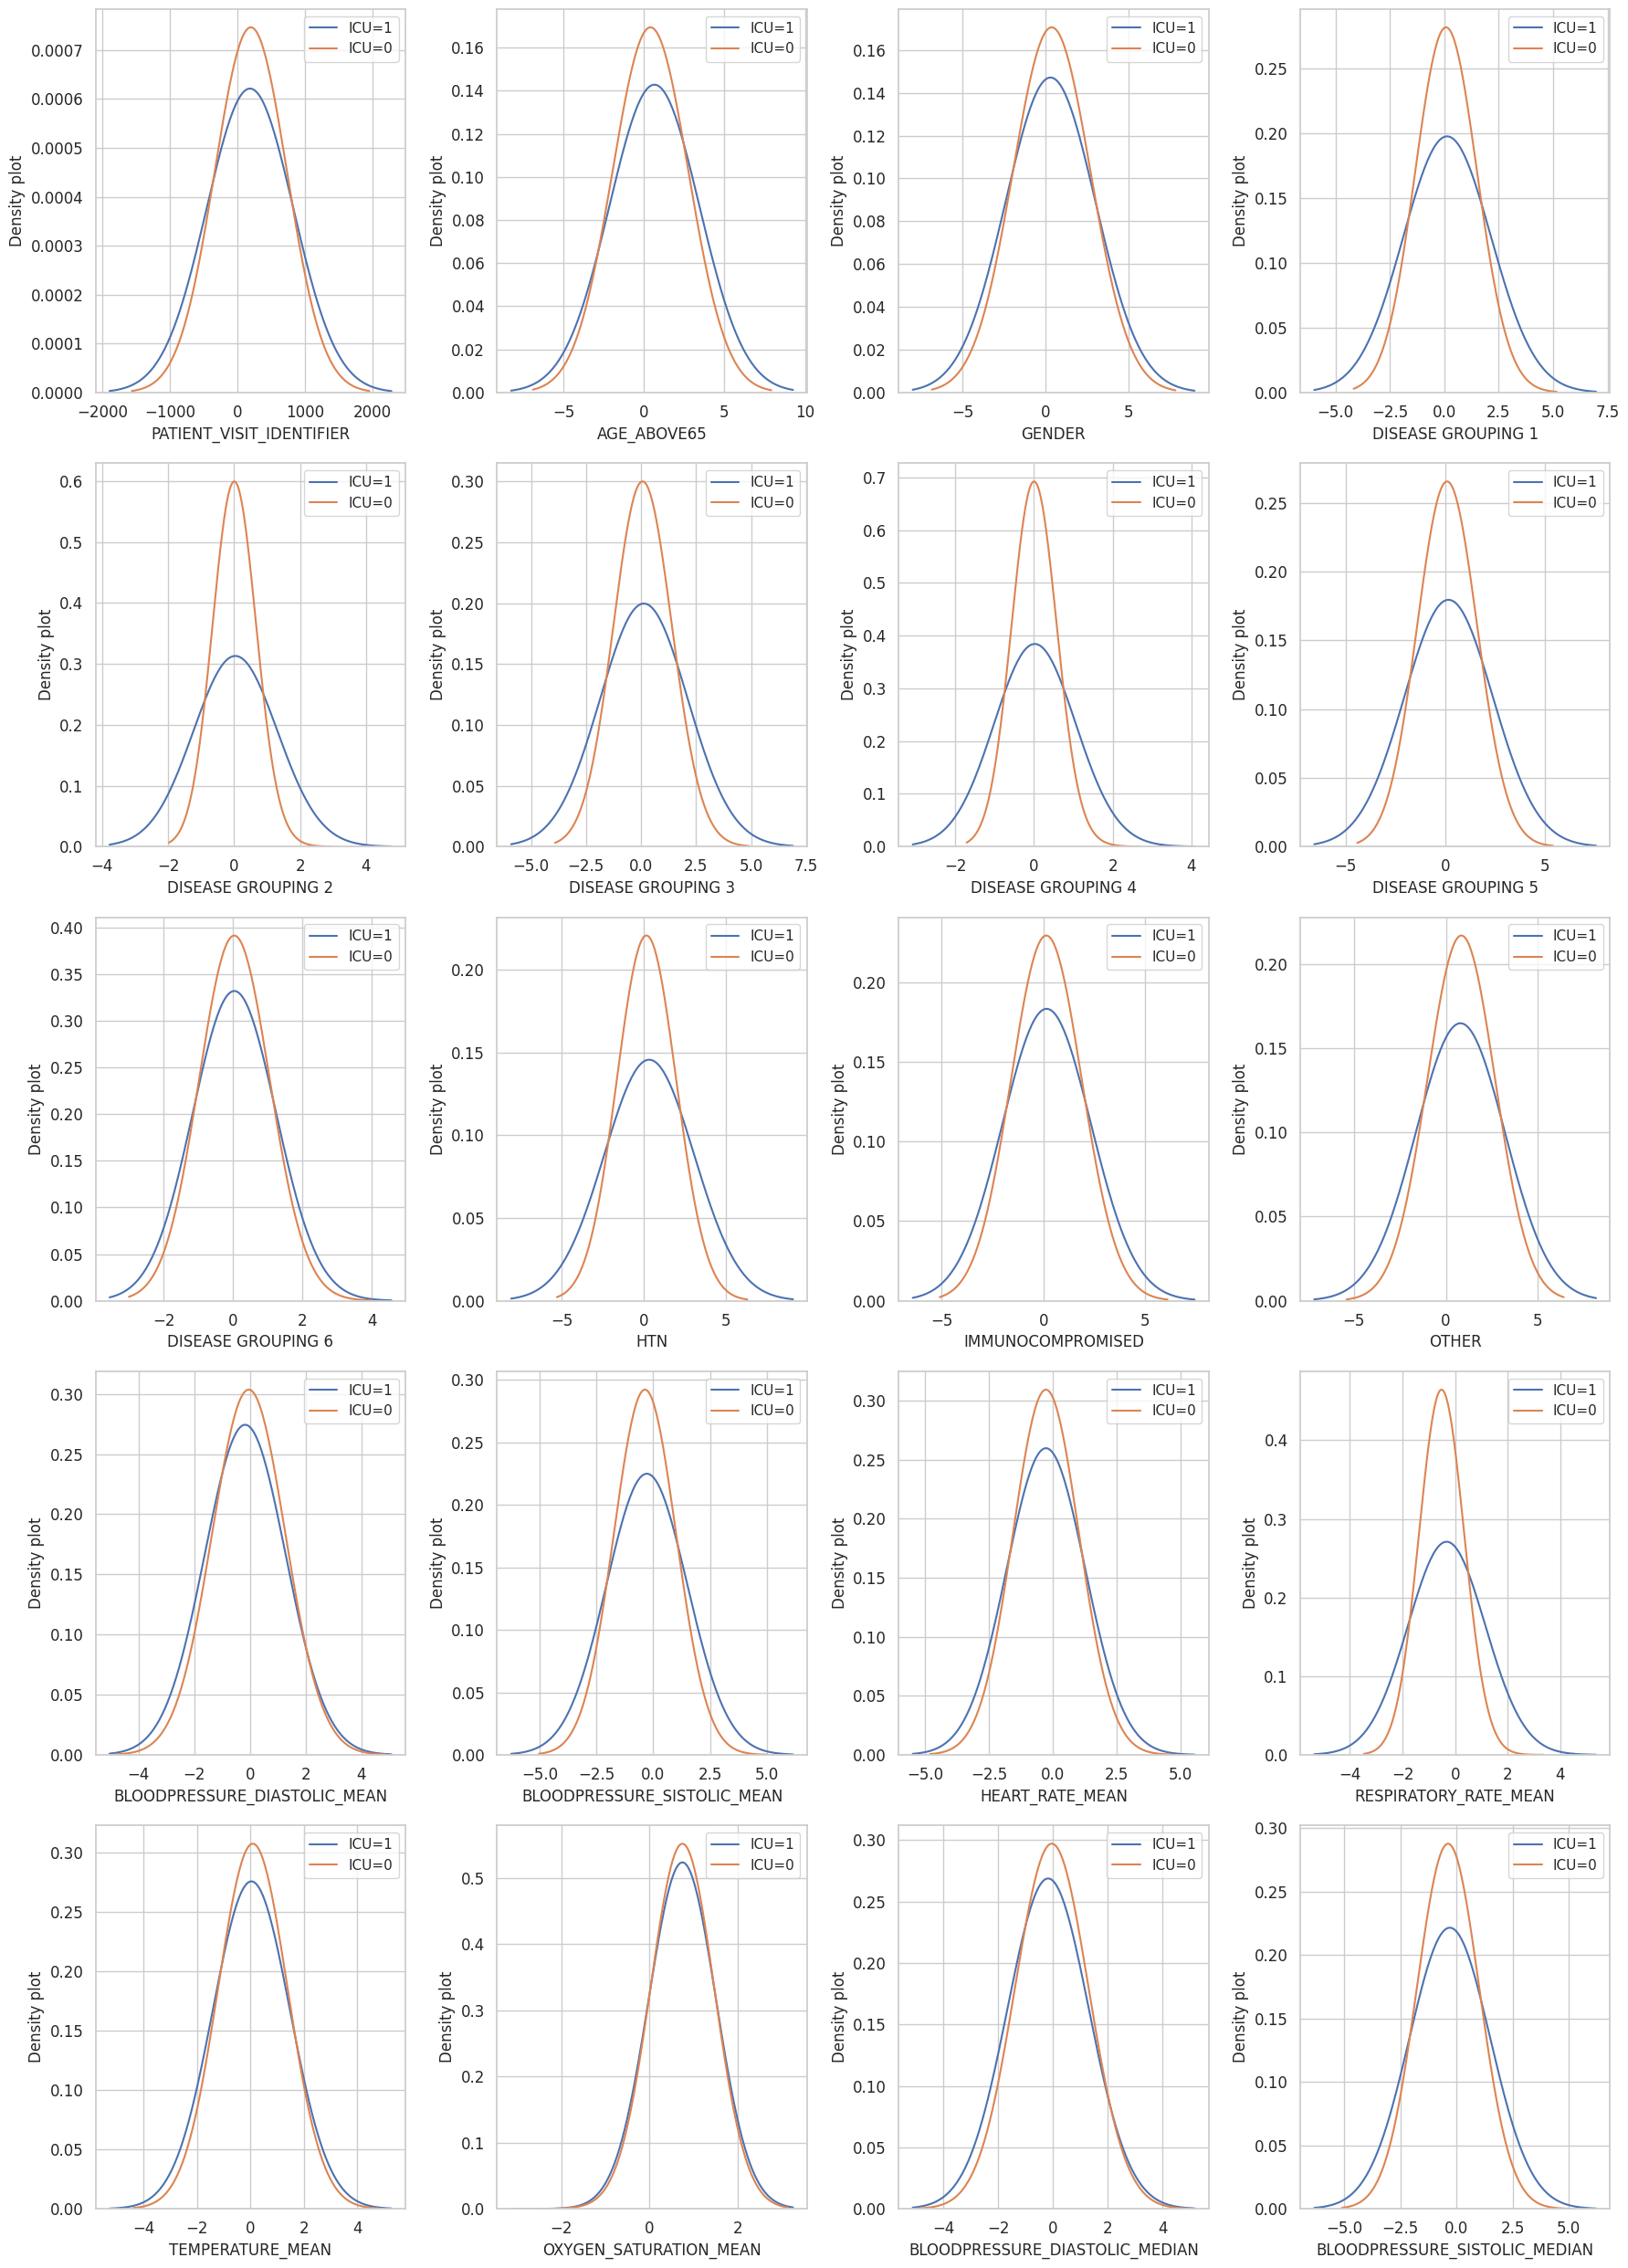

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns of interest

columns_of_interest_1 =  ['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER', 'BLOODPRESSURE_DIASTOLIC_MEAN', 'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN', 'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN', 'BLOODPRESSURE_DIASTOLIC_MEDIAN', 'BLOODPRESSURE_SISTOLIC_MEDIAN']

columns_of_interest_2 = ['HEART_RATE_MEDIAN', 'RESPIRATORY_RATE_MEDIAN', 'TEMPERATURE_MEDIAN', 'OXYGEN_SATURATION_MEDIAN', 'BLOODPRESSURE_DIASTOLIC_MIN', 'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN', 'TEMPERATURE_MIN', 'OXYGEN_SATURATION_MIN', 'BLOODPRESSURE_DIASTOLIC_MAX', 'BLOODPRESSURE_SISTOLIC_MAX', 'HEART_RATE_MAX', 'RESPIRATORY_RATE_MAX', 'TEMPERATURE_MAX', 'OXYGEN_SATURATION_MAX', 'BLOODPRESSURE_DIASTOLIC_DIFF', 'BLOODPRESSURE_SISTOLIC_DIFF', 'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', ]

columns_of_interest_3 = ['TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF', 'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL', 'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL', 'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL',]

def density_plot(columns_of_interest, num, num_2):
  sns.set_style('whitegrid')
  plt.figure()
  fig, ax = plt.subplots(num, 4, figsize=(18, num_2))

  for i, feature in enumerate(columns_of_interest):
      row, col = divmod(i, 4)
      sns.kdeplot(data[data['ICU'] == 1][feature], bw_adjust=20, ax=ax[row, col])
      sns.kdeplot(data[data['ICU'] == 0][feature], bw_adjust=20, ax=ax[row, col])
      ax[row, col].set_ylabel('Density plot', fontsize=12)
      ax[row, col].set_xlabel(feature, fontsize=12)
      ax[row, col].tick_params(axis='both', which='major', labelsize=12)
      ax[row, col].legend(['ICU=1', 'ICU=0'], loc='best')

  plt.tight_layout()
  plt.show()
density_plot(columns_of_interest_3, 2, 12)
density_plot(columns_of_interest_2, 5, 25)
density_plot(columns_of_interest_1, 5, 25)


From here observation let us know about the realtion of that category whether this should be used in the making decision or not, conluding we will drop to columns
- OXYGEN_SATURATION_MEDIAN
- OXYGEN_SATURATION_MAX

Analysis of charts. The following features have a high degree of overlap with ICU admission and are therefore likely not very predictive:

1. GENDER
2. DISEASE GROUPING 6
3. IMMUNOCOMPROMISED
4. OTHER

The other features do not overlap as much with ICU admission and therefore appear to be more predictive.

###Window

In [109]:
pd.crosstab(data.WINDOW, data.ICU)

ICU         0    1
WINDOW            
0-2       353   32
2-4       326   59
4-6       286   99
6-12      255  130
ABOVE_12  190  195

In [110]:
icu_personal = data.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False).agg({"ICU":list, "WINDOW":list})
icu_personal.head(15)

PATIENT_VISIT_IDENTIFIER              ICU                           WINDOW
0                          0  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
1                          1  [1, 1, 1, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
2                          2  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
3                          3  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
4                          4  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
5                          5  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
6                          6  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
7                          7  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
8                          8  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
9                          9  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
10                        10  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
11                        11  [0, 0, 0, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
12                        12  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
13                        13  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
14                        14  [0, 0, 1, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]

###correlation

In [111]:
df_corr= data.corr()
#msno.heatmap(df_corr)

<ipython-input-111-6d10457fe32d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr= data.corr()


In [112]:
# Show correlation values in stacked format
def rank_correlation_score (data):

    # Stacked correlation map into 3-columns format
    stacked_corr = data.corr().stack().reset_index().rename(
        columns = {"level_0":"Feature_1",
                   "level_1":"Feature_2",
                   0: "Pearson_Correlation"})

    # Remove redudant relationships
    stacked_corr = stacked_corr.query('Feature_1 != Feature_2')
    chained_feature_names = ['-'.join(np.sort(x)) for x in stacked_corr[['Feature_1', 'Feature_2']].values]
    stacked_corr.loc[:,'Duplicate_Key'] = chained_feature_names
    stacked_corr = stacked_corr.drop_duplicates(subset = 'Duplicate_Key').drop(columns = 'Duplicate_Key')

    #Remove correlations to the target
    stacked_corr = stacked_corr[stacked_corr['Feature_1'] != 'ICU']
    stacked_corr = stacked_corr[stacked_corr['Feature_2'] != 'ICU']

    # Order absolute correlation strenght
    stacked_corr['Pearson_Correlation'] = abs(stacked_corr['Pearson_Correlation'])
    return stacked_corr.sort_values(by='Pearson_Correlation', ascending=False)


stacked_df_corr = rank_correlation_score(data)
stacked_df_corr

<ipython-input-112-f7580c0d87c8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stacked_corr = data.corr().stack().reset_index().rename(
<ipython-input-112-f7580c0d87c8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stacked_corr.loc[:,'Duplicate_Key'] = chained_feature_names


Feature_1               Feature_2  Pearson_Correlation
27161          TGP_MEDIAN                TGP_MEAN             1.000000
23282    POTASSIUM_MEDIAN           POTASSIUM_MIN             1.000000
7955         CALCIUM_MEAN             CALCIUM_MIN             1.000000
7956         CALCIUM_MEAN             CALCIUM_MAX             1.000000
13195          INR_MEDIAN                 INR_MAX             1.000000
...                   ...                     ...                  ...
400                GENDER             ALBUMIN_MIN             0.000063
399                GENDER            ALBUMIN_MEAN             0.000063
398                GENDER          ALBUMIN_MEDIAN             0.000063
401                GENDER             ALBUMIN_MAX             0.000063
764    DISEASE GROUPING 1  OXYGEN_SATURATION_DIFF             0.000040

[18336 rows x 3 columns]

In [113]:
#Filter very strong correlations
stacked_df_corr[stacked_df_corr['Pearson_Correlation'] > 0.99]

Feature_1                        Feature_2  \
27161                   TGP_MEDIAN                         TGP_MEAN   
23282             POTASSIUM_MEDIAN                    POTASSIUM_MIN   
7955                  CALCIUM_MEAN                      CALCIUM_MIN   
7956                  CALCIUM_MEAN                      CALCIUM_MAX   
13195                   INR_MEDIAN                          INR_MAX   
...                            ...                              ...   
35896       OXYGEN_SATURATION_DIFF       OXYGEN_SATURATION_DIFF_REL   
35120  BLOODPRESSURE_SISTOLIC_DIFF  BLOODPRESSURE_SISTOLIC_DIFF_REL   
30658              HEART_RATE_MEAN                HEART_RATE_MEDIAN   
35508        RESPIRATORY_RATE_DIFF        RESPIRATORY_RATE_DIFF_REL   
30464  BLOODPRESSURE_SISTOLIC_MEAN    BLOODPRESSURE_SISTOLIC_MEDIAN   

       Pearson_Correlation  
27161             1.000000  
23282             1.000000  
7955              1.000000  
7956              1.000000  
13195             1.000000  
...                    ...  
35896             0.999831  
35120             0.991276  
30658             0.991238  
35508             0.991107  
30464             0.990993  

[222 rows x 3 columns]

According to the Pearson correlation results, all columns above 0.99 indicate high similarity with each other. In this case, similar columns need to be extracted from regular columns

#Task 2 - Data Preparation

##Remove columns and rows that are missing too much data

In [114]:
# Drop columns missing more than 50% of their data

# Calculate percentage of missing data for each feature
percent_of_missing_data_in_each_feature = data.isnull().mean() * 100

# Collect names of columns to be dropped
names_of_columns_to_drop = []
for index, (feature, percent) in enumerate (percent_of_missing_data_in_each_feature.items()):
  if percent > 50:
    names_of_columns_to_drop.append(feature)

# Create new "clean" data frame
data_clean = data.copy()

print(f"Number of columns in data frame that I will not modify: {len(data.columns)}")




# Drop each column in clean data frame that is missing more than 50% of data
for column in names_of_columns_to_drop:
  data_clean.drop([column], axis=1, inplace=True)


# verify 231 - 180 = 51
print(f"Number of columns in data set that I want to modify:  {len(data_clean.columns)}")

Number of columns in data frame that I will not modify: 231
Number of columns in data set that I want to modify:  51


In [115]:
# Remove rows associated with patient 199 as no measurements were taken
data_clean = data_clean[data_clean['PATIENT_VISIT_IDENTIFIER'] != 199]

##Handling inappropriate data types

##Data Imputation

In [116]:
#Change the two object (string) columns into numerical data

definitions = []

for column in data_clean.columns:
    if data_clean[column].dtype == 'object':
      # Get codes and uniques from object column. Returns tuple of two items
      codesAndUniques = pd.factorize(data_clean[column])

      # Replace object column data with codes. First item of tuple.
      data_clean[column] = codesAndUniques[0]

      # Append codes and uniques to array
      definitions.append([np.unique( codesAndUniques[0]),  codesAndUniques[1]])

print(f"Here are the definitions for the object columns that were just encoded as integers: \n\n{definitions}\n")

print("To verify, here are the data types for each column:\n")
for index, column in enumerate(data_clean.columns):
  print(f"{index}. {column} is {data_clean[column].dtype}")

Here are the definitions for the object columns that were just encoded as integers: 

[[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), Index(['60th', '90th', '10th', '40th', '70th', '20th', '50th', '80th', '30th',
       'Above 90th'],
      dtype='object')], [array([0, 1, 2, 3, 4]), Index(['0-2', '2-4', '4-6', '6-12', 'ABOVE_12'], dtype='object')]]

To verify, here are the data types for each column:

0. PATIENT_VISIT_IDENTIFIER is int64
1. AGE_ABOVE65 is int64
2. AGE_PERCENTIL is int64
3. GENDER is int64
4. DISEASE GROUPING 1 is float64
5. DISEASE GROUPING 2 is float64
6. DISEASE GROUPING 3 is float64
7. DISEASE GROUPING 4 is float64
8. DISEASE GROUPING 5 is float64
9. DISEASE GROUPING 6 is float64
10. HTN is float64
11. IMMUNOCOMPROMISED is float64
12. OTHER is float64
13. BLOODPRESSURE_DIASTOLIC_MEAN is float64
14. BLOODPRESSURE_SISTOLIC_MEAN is float64
15. HEART_RATE_MEAN is float64
16. RESPIRATORY_RATE_MEAN is float64
17. TEMPERATURE_MEAN is float64
18. OXYGEN_SATURATION_MEAN is float64


<ipython-input-116-c80f35de20f4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[column] = codesAndUniques[0]
<ipython-input-116-c80f35de20f4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[column] = codesAndUniques[0]


<Axes: >

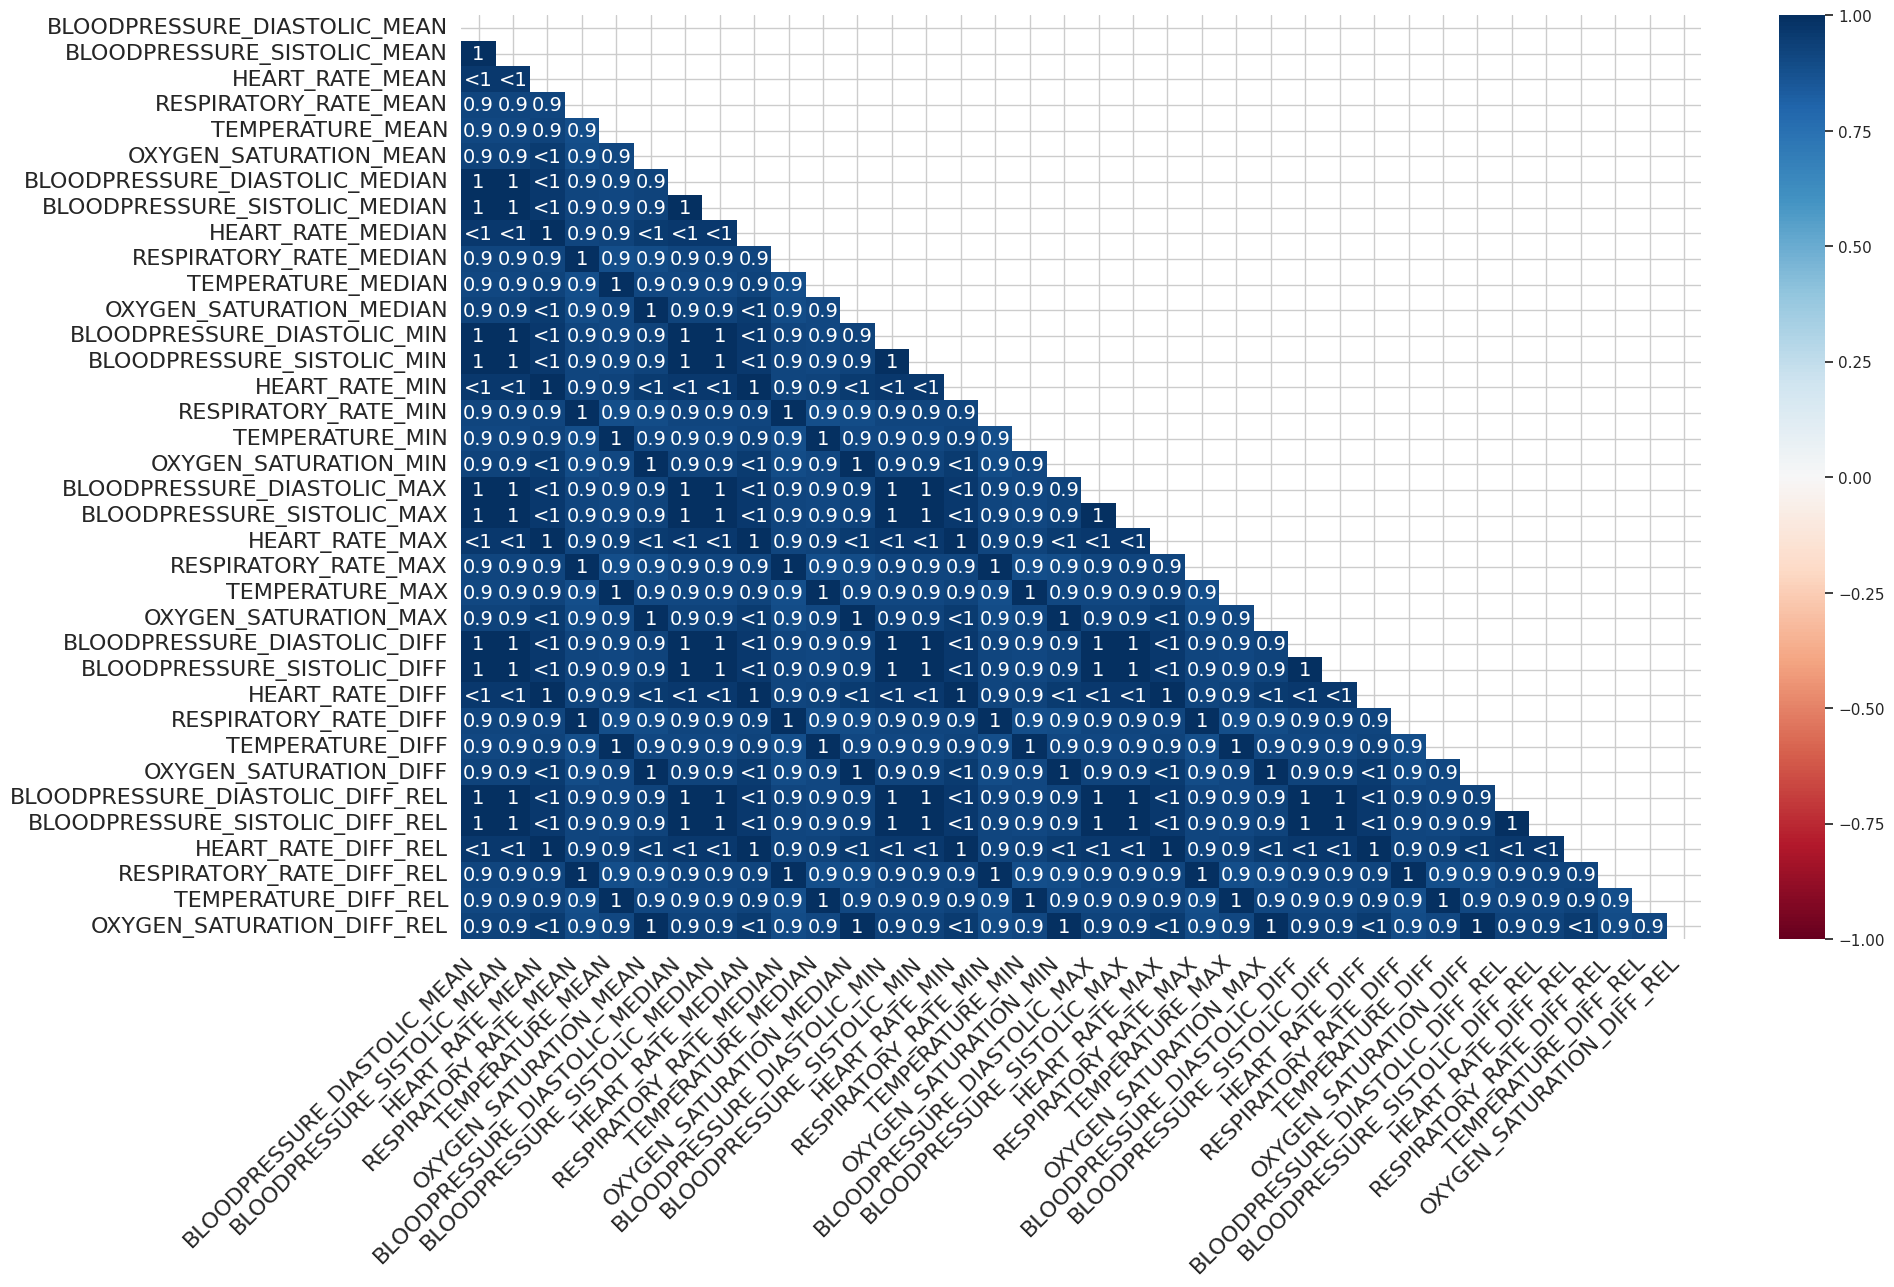

In [117]:
msno.heatmap(data_clean)

Displaying Data before imputing

<Axes: >

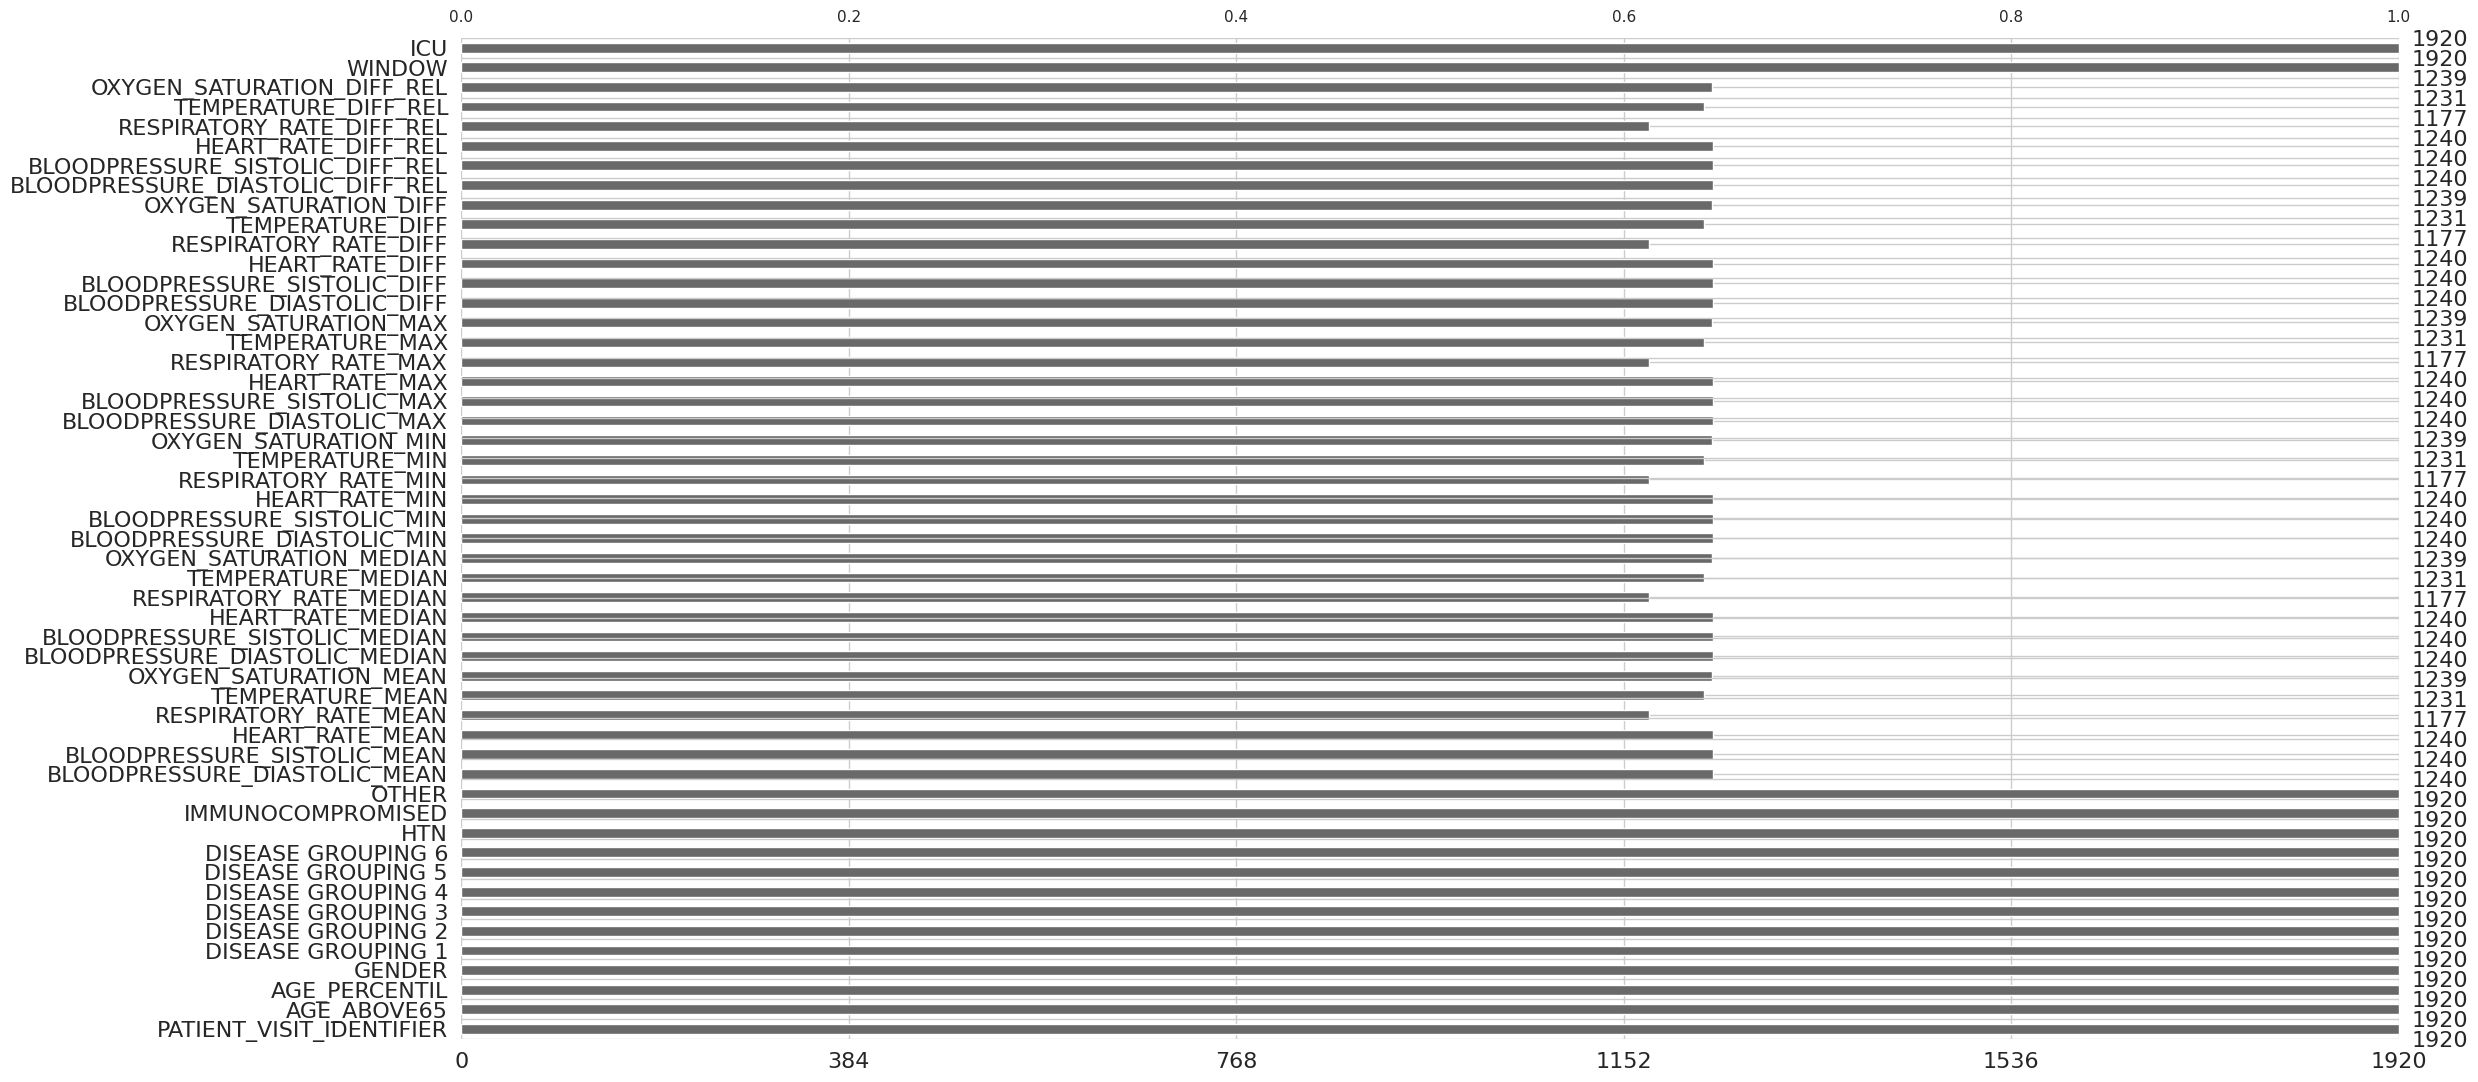

In [118]:
msno.bar(data_clean)

In [119]:
# impute function. takes data frame, column name, and patient id as arguments
def impute_locf_or_nocb(df, column_name, id):
  column = df[column_name]

  # find first and last non-NaN values for the column
  first_valid_index = column.first_valid_index()
  last_valid_index = column.last_valid_index()

  # Find the second valid index
  second_valid_index = column[column.index > first_valid_index].first_valid_index()

  # If there's no second valid index, default to the first valid index
  second_valid_index = second_valid_index if second_valid_index is not None else first_valid_index

  # Store the value at the second valid index
  second_index_value = column[second_valid_index]

  # patients 69, 84, 312, and 329 were causing issues. Seems like for some columns, they only had last value.
  if first_valid_index == last_valid_index:
    # try back fill first? Then front fill in case my logic is wrong
    df[column_name] = column.bfill().ffill()
    #Useful print statement for debugging
    #print(f'Patient id {id} has an issue at column {column_name} as {df[column_name][first_valid_index]} = {df[column_name][last_valid_index]}')
  else:
    for i in column.index:
      # Skip if the value is not null
      if not pd.isnull(column[i]):
        continue
      # if i is closer to first valid index, take that value
      if abs(i - first_valid_index) < abs(last_valid_index - i):
        df.loc[i, column_name] = column[first_valid_index]
      # if i is closer to last valid index, take that value
      elif abs(i - first_valid_index) > abs(last_valid_index - i):
        df.loc[i, column_name] = column[last_valid_index]
      # if it's in the middle, take the second valid index
      else:
        df.loc[i, column_name] = second_index_value

# collect array of all unique patient IDs
patient_ids = data_clean['PATIENT_VISIT_IDENTIFIER'].unique()
imputed_data_sets = []

for id in patient_ids:
  # create a mini data set just for that patient
  mini_df = data_clean[data_clean['PATIENT_VISIT_IDENTIFIER'] == id].copy()
  # find columns that need to be imputed for that patient
  percent_of_missing_data_in_each_column = mini_df.isnull().mean() * 100
  for column_name, percent in percent_of_missing_data_in_each_column.items():
    if percent > 10:
      impute_locf_or_nocb(mini_df, column_name, id)

  imputed_data_sets.append(mini_df)

# Reassemble the imputed datasets
imputed_full_df = pd.concat(imputed_data_sets)

# Replace data_clean with this imputed data
data_clean = imputed_full_df.copy()

# Display records so you can review the imputation method. Can display all 1920 if you need to debug
print(data_clean.head(5))

   PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  AGE_PERCENTIL  GENDER  \
0                         0            1              0       0   
1                         0            1              0       0   
2                         0            1              0       0   
3                         0            1              0       0   
4                         0            1              0       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  ...  \
0                 0.0                 1.0                 1.0  ...   
1                 0.0                 1.0                 1.0  ...

In [120]:
patient_ids = data_clean['PATIENT_VISIT_IDENTIFIER'].unique()
data_sets_with_icu_admissions_removed = []

for id in patient_ids:
  mini_df = data_clean[data_clean['PATIENT_VISIT_IDENTIFIER'] == id].copy()
  icu_admission_index = mini_df[mini_df['ICU'] == 1].index
  if not icu_admission_index.empty:
    first_icu_admission_index = icu_admission_index[0]
    rows_to_remove = mini_df[mini_df.index > first_icu_admission_index].index
    mini_df = mini_df.drop(rows_to_remove)

  data_sets_with_icu_admissions_removed.append(mini_df)

# Reassemble the imputed datasets
icu_adjusted_df = pd.concat(data_sets_with_icu_admissions_removed)

# Replace data_clean with this imputed data
data_clean = icu_adjusted_df.copy()

<Axes: >

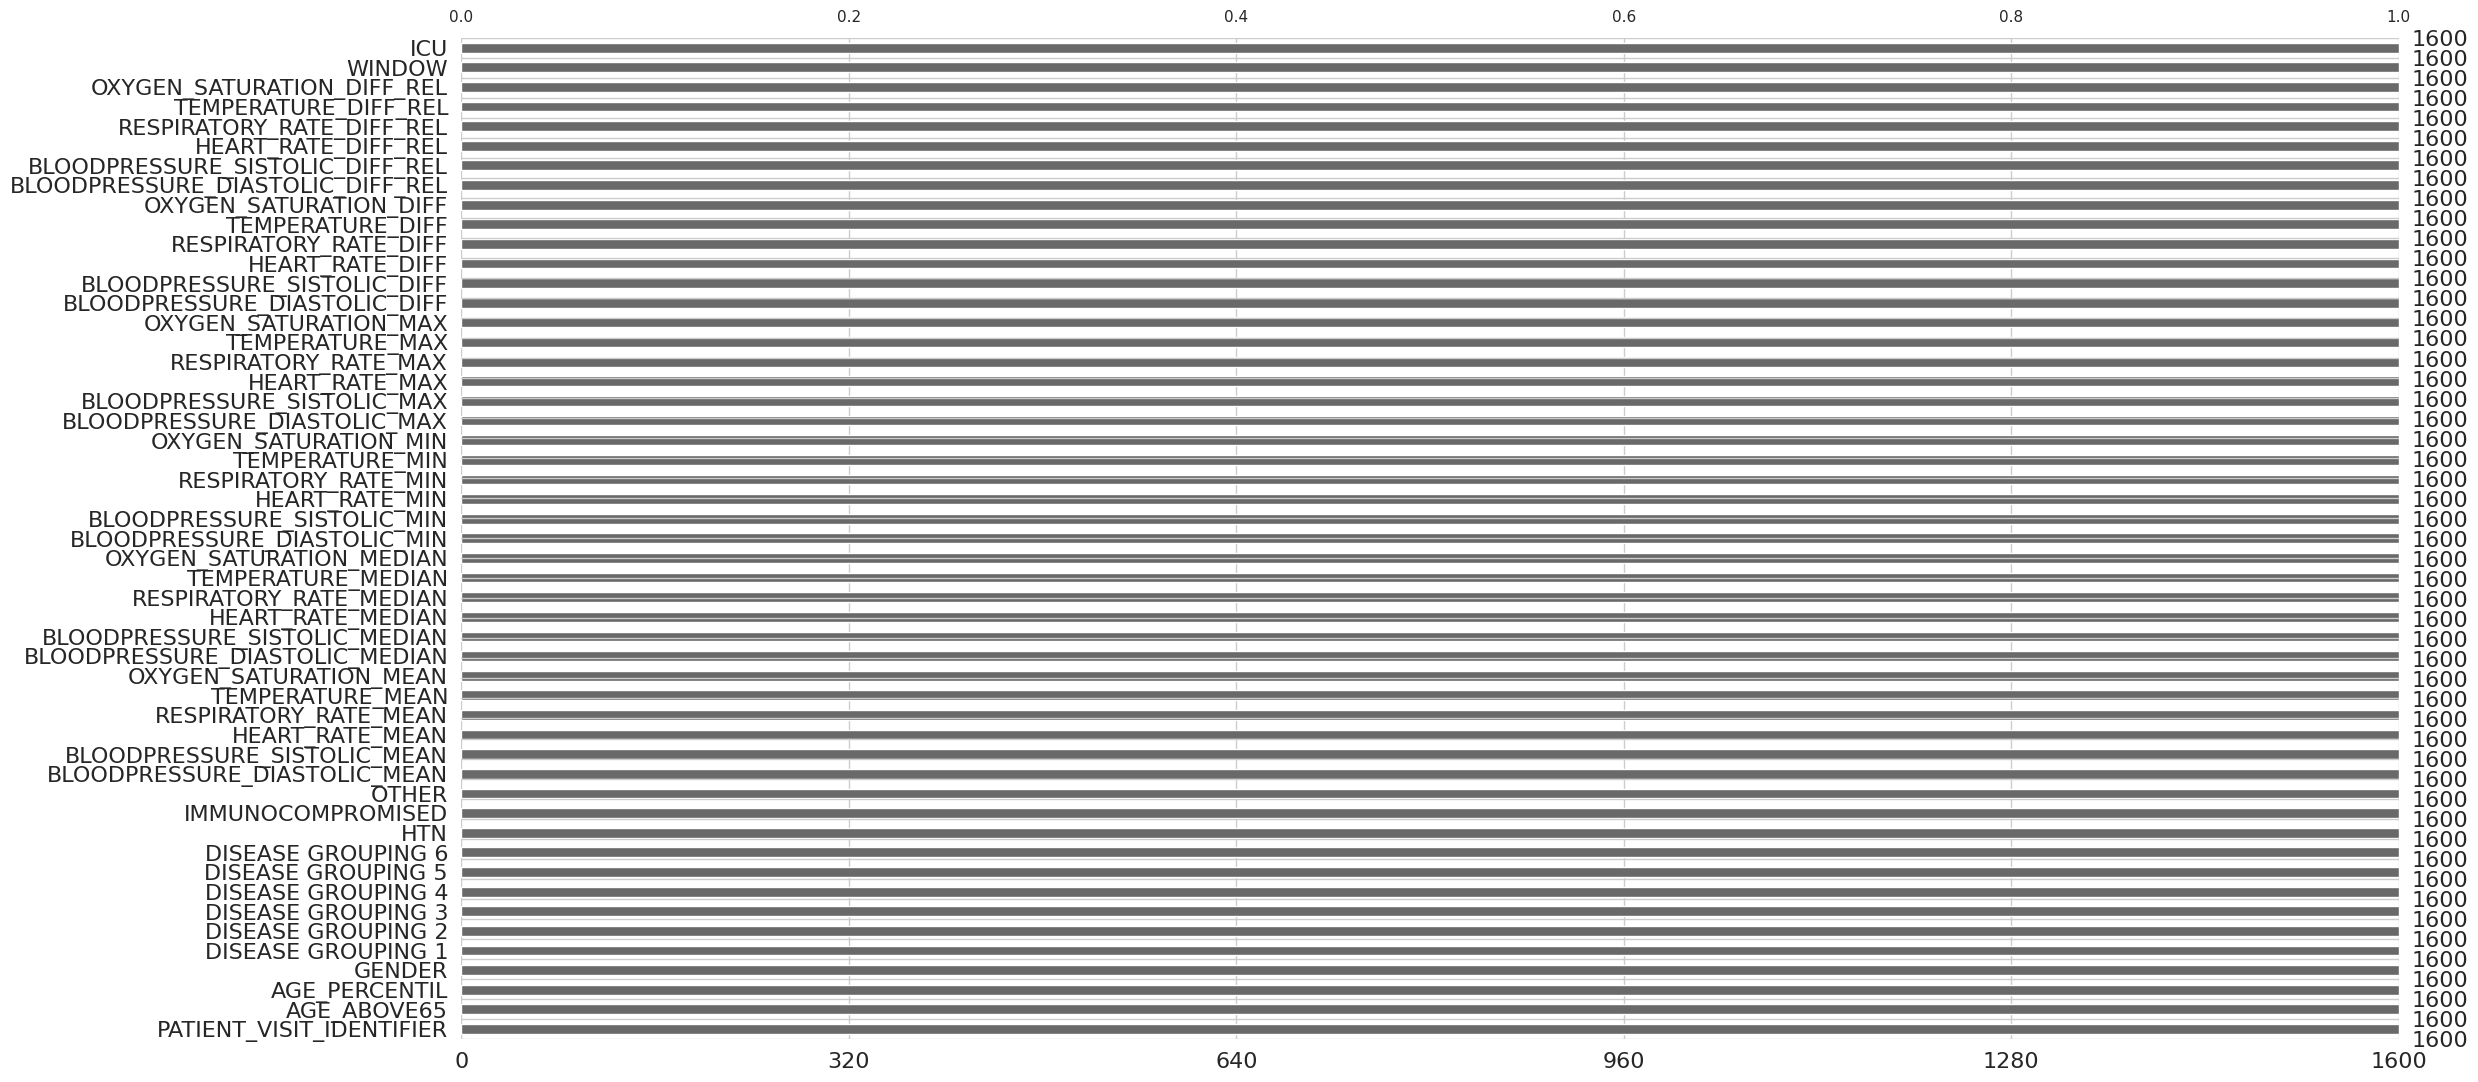

In [121]:
# Check if this worked
msno.bar(data_clean)

##Remove Data After ICU Admission

Remove data for patients after admission to ICU as this data cannot be used for modeling (data leakage)

In [122]:
# Before removing data after ICU admission
print(len(data_clean[data_clean['ICU']==1]))
print(len(data_clean[data_clean['ICU']==0]))

195
1405


In [123]:
# Can more easily see that this worked from tail end of data
print(data_clean.tail(10))

      PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  AGE_PERCENTIL  GENDER  \
1915                       383            0              3       1   
1916                       383            0              3       1   
1917                       383            0              3       1   
1918                       383            0              3       1   
1919                       383            0              3       1   
1920                       384            0              6       1   
1921                       384            0              6       1   
1922                       384            0              6       1   
1923                       384            0              6       1   
1924                       384            0              6       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
1915                 0.0                 0.0                 0.0   
1916                 0.0                 0.0                 0.0   
1917                 0.0 

In [124]:
# After removing data after ICU admission
print(len(data_clean[data_clean['ICU']==1]))
print(len(data_clean[data_clean['ICU']==0]))

195
1405


##Split data into train and test data sets and balance ICU bias

In [125]:
# Split the data into training and testing sets
random_seed = 10
train_data, test_data = train_test_split(data_clean, test_size=0.2, random_state=random_seed)

In [126]:
# Before balancing bias in ICU admission
print(len(train_data[train_data['ICU']==1]))
print(len(train_data[train_data['ICU']==0]))

152
1128


In [127]:
# get list of column names
column_names = train_data.columns.tolist()

# Balance bias in ICU admission
featuresMatrix = train_data[train_data.columns[:-1]].values
targetVector = train_data[train_data.columns[-1]].values

ros = RandomOverSampler()

featuresMatrix, targetVector = ros.fit_resample(featuresMatrix, targetVector)
train_data_array = np.hstack((featuresMatrix, np.reshape(targetVector, (-1, 1))))

train_data = pd.DataFrame(train_data_array, columns=column_names)

In [128]:
# After balancing bias in ICU admission
print(len(train_data[train_data['ICU']==1]))
print(len(train_data[train_data['ICU']==0]))

1128
1128


In [129]:
# Saving features matrix (X) and target vector (y) in variables
trainDataFeaturesMatrix = train_data[train_data.columns[:-1]].values
trainDataTargetVector = train_data[train_data.columns[-1]].values

testDataFeaturesMatrix = test_data[train_data.columns[:-1]].values
testDataTargetVector = test_data[train_data.columns[-1]].values

#Task 3 - Implement Machine Learning Models


##k-nearest neighbors

In [130]:
knn_model = KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm="brute",leaf_size=40)
knn_model.fit(trainDataFeaturesMatrix, trainDataTargetVector)

KNeighborsClassifier(algorithm='brute', leaf_size=40, n_neighbors=3,
                     weights='distance')

In [131]:
y_pred1 = knn_model.predict(testDataFeaturesMatrix)
count = 0


In [132]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
def model_metrics(trainDataTargetVector, y_pred1):
  tn, fp, fn, tp = confusion_matrix(trainDataTargetVector, y_pred1).ravel()
  specificity = tn/(tn+fp)
  sensitivity=tp/(tp+fn)
  print("Sensitivity:",sensitivity*100)
  print("Specificity:",specificity*100)
  print("ROC_AUC_Score:",roc_auc_score(trainDataTargetVector, y_pred1)*100)
accuracy = accuracy_score(testDataTargetVector, y_pred1)
print(f'Accuracy score for KNeighbours Classifier - ',accuracy*100,'Percent')
print(classification_report(testDataTargetVector, y_pred1))
model_metrics(testDataTargetVector, y_pred1)

Accuracy score for KNeighbours Classifier -  80.3125 Percent
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       277
           1       0.17      0.12      0.14        43

    accuracy                           0.80       320
   macro avg       0.52      0.51      0.51       320
weighted avg       0.77      0.80      0.79       320

Sensitivity: 11.627906976744185
Specificity: 90.97472924187726
ROC_AUC_Score: 51.30131810931072


##Random Forest

In [133]:
rf_model = RandomForestClassifier(criterion='entropy',random_state=24,max_depth=9,max_leaf_nodes=5,
                                  bootstrap=True,min_samples_split=3)
rf_model.fit(trainDataFeaturesMatrix, trainDataTargetVector)

RandomForestClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=5,
                       min_samples_split=3, random_state=24)

In [134]:
y_pred2 = rf_model.predict(testDataFeaturesMatrix)


In [135]:
accuracy = accuracy_score(testDataTargetVector, y_pred2)
print(f'Accuracy score for Random Forest - ',accuracy*100,'Percent')
print(classification_report(testDataTargetVector, y_pred2))
model_metrics(testDataTargetVector, y_pred2)

Accuracy score for Random Forest -  85.625 Percent
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       277
           1       0.48      0.81      0.60        43

    accuracy                           0.86       320
   macro avg       0.72      0.84      0.76       320
weighted avg       0.90      0.86      0.87       320

Sensitivity: 81.3953488372093
Specificity: 86.28158844765343
ROC_AUC_Score: 83.83846864243138


##Support Vector Machine

In [136]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(trainDataFeaturesMatrix, trainDataTargetVector)



SVC(kernel='linear')

In [137]:
# y_pred3 = svm_model.predict(testDataFeaturesMatrix)
y_pred3 = clf.predict(testDataFeaturesMatrix)

In [138]:
accuracy = accuracy_score(testDataTargetVector, y_pred3)
print(f'Accuracy score for SVM - ',accuracy*100,'Percent')
print(classification_report(testDataTargetVector, y_pred3))
model_metrics(testDataTargetVector, y_pred3)

Accuracy score for SVM -  81.875 Percent
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       277
           1       0.41      0.84      0.55        43

    accuracy                           0.82       320
   macro avg       0.69      0.83      0.72       320
weighted avg       0.90      0.82      0.84       320

Sensitivity: 83.72093023255815
Specificity: 81.58844765342961
ROC_AUC_Score: 82.65468894299389


#Task 4 - AI Fairness 360 Toolkit Implementation

In [139]:
print(f"Number of Rows: {data_clean.shape[0]}")
print(f"Number of Columns: {data_clean.shape[1]}")

Number of Rows: 1600
Number of Columns: 51


In [140]:
print(f"Number of Rows: {train_data.shape[0]}")
print(f"Number of Columns: {train_data.shape[1]}")

Number of Rows: 2256
Number of Columns: 51


In [141]:
print(f"Number of Rows: {test_data.shape[0]}")
print(f"Number of Columns: {test_data.shape[1]}")

Number of Rows: 320
Number of Columns: 51


##Identify imbalances

0.0    1466
1.0     790
Name: GENDER, dtype: int64
- - - - - - - - - - - - - - -
0.0    1149
1.0    1107
Name: AGE_ABOVE65, dtype: int64
- - - - - - - - - - - - - - -
6.0    272
7.0    258
9.0    254
3.0    235
5.0    224
4.0    217
8.0    207
0.0    199
2.0    197
1.0    193
Name: AGE_PERCENTIL, dtype: int64


<ipython-input-142-f472c93aa58e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'GENDER', data = train_data, palette = 'nipy_spectral', width = 0.3)
<ipython-input-142-f472c93aa58e>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'AGE_ABOVE65', data = train_data, palette = 'nipy_spectral', width = 0.3)
<ipython-input-142-f472c93aa58e>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'AGE_PERCENTIL', data = train_data, palette = 'Set1', width = 0.3)


<Axes: xlabel='AGE_PERCENTIL', ylabel='count'>

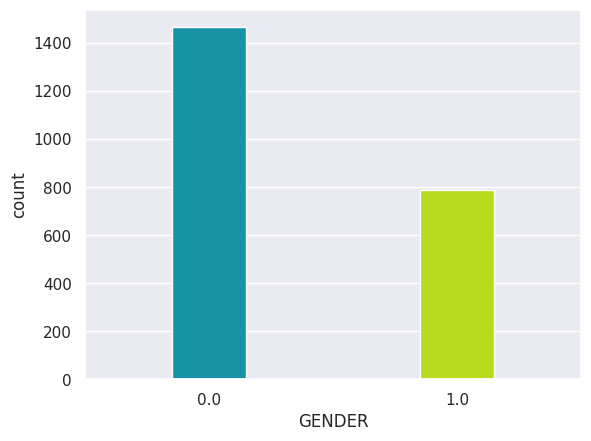

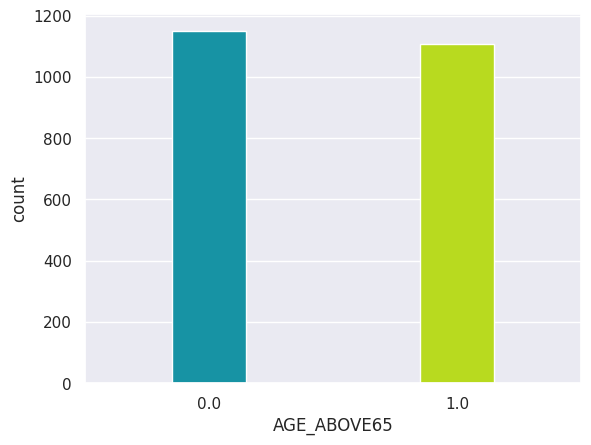

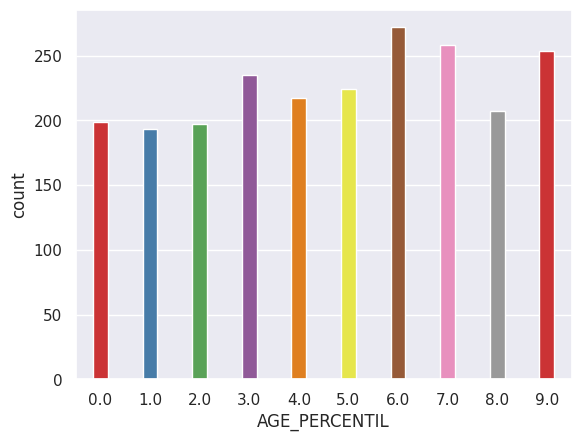

In [142]:
# Set styling for plots
sns.set_style('white')
sns.set(font_scale=1)

genderCounts = train_data.GENDER.value_counts()
print(genderCounts)
print("- - - - - - - - - - - - - - -")
ageAboveCounts = train_data.AGE_ABOVE65.value_counts()
print(ageAboveCounts)
print("- - - - - - - - - - - - - - -")
agePercentilCounts = train_data.AGE_PERCENTIL.value_counts()
print(agePercentilCounts)



# New figure instance
plt.figure()
# Fill new figure instance with data
sns.countplot(x = 'GENDER', data = train_data, palette = 'nipy_spectral', width = 0.3)


# New figure instance
plt.figure()
# Fill new figure instance with data
sns.countplot(x = 'AGE_ABOVE65', data = train_data, palette = 'nipy_spectral', width = 0.3)

# New figure instance
plt.figure()
# Fill new figure instance with data
sns.countplot(x = 'AGE_PERCENTIL', data = train_data, palette = 'Set1', width = 0.3)

##Remove Imbalances

Before performing over-sampling on the GENDER column, we have 2256 rows
After performing over-sampling on the GENDER column, we have 2932 rows
1.0    1466
0.0    1466
Name: GENDER, dtype: int64


<ipython-input-143-1d63b55fd63d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y_resampled, palette='Set1', width=0.3)


<Axes: xlabel='GENDER', ylabel='count'>

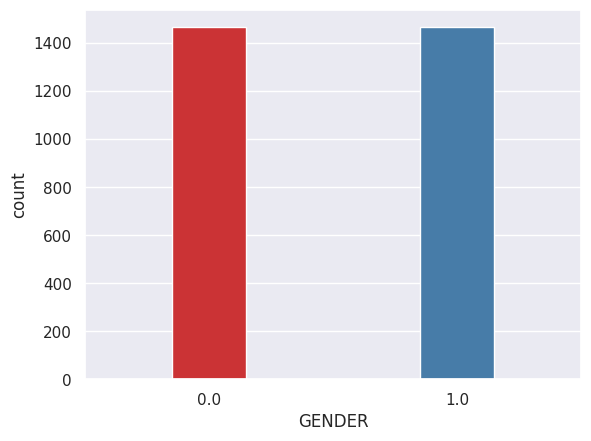

In [143]:
from imblearn.over_sampling import RandomOverSampler

print(f"Before performing over-sampling on the GENDER column, we have {train_data.shape[0]} rows")

# Oversample gender to balance
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(train_data, train_data.GENDER)

print(f"After performing over-sampling on the GENDER column, we have {x_resampled.shape[0]} rows")

balancedGenderCounts = y_resampled.value_counts()
print(balancedGenderCounts)

plt.figure()
sns.countplot(x = y_resampled, palette='Set1', width=0.3)

##Identify Biases

In [144]:
!pip install aif360
import aif360
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing

In [145]:
# Identifying biases
# INSERT BRIEF EXPLANATION HERE
biasedDatasetOfGender = StandardDataset(              #Creating dataset of gender from original dataset that is preassumaly biased
    df=data_clean,
    label_name='GENDER',
    favorable_classes=[1],
    protected_attribute_names= ['ICU'],
    privileged_classes=[[1]]
)


In [146]:
classifier = RandomForestClassifier(random_state=42)
X_train = data_clean['GENDER'].values
y_train = data_clean['ICU'].ravel()
classifier.fit(X_train.reshape(-1, 1), y_train)



RandomForestClassifier(random_state=42)

In [147]:
# Make predictions on the test set
X_test = data_clean['GENDER'].values
y_pred = classifier.predict(X_test.reshape(-1, 1))
count = 0
for i in data_clean.ICU:
  if i == 1:
    count = count+1
print(count)



195


In [148]:
from sklearn.metrics import mean_absolute_percentage_error
from aif360.datasets import StandardDataset
from aif360.algorithms.preprocessing import Reweighing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

disparate_impact_value_before = mean_absolute_percentage_error(data_clean.GENDER, y_pred)
print(f'Disparate Impact before removing bias: {disparate_impact_value_before}')

# Assuming you have already loaded your dataset into a StandardDataset named 'dataset'

df = biasedDatasetOfGender.convert_to_dataframe()[0]

# Split the dataset into training and testing sets
privileged_groups = [{'GENDER': 1}]  # Specify the privileged group based on the protected attribute
unprivileged_groups = [{'GENDER': 0}]  # Specify the unprivileged group based on the protected attribute
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


Disparate Impact before removing bias: 0.379375


In [149]:
# Evaluate the accuracy
accuracy = accuracy_score(y_resampled[0:1600], y_pred)
print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_report(y_resampled[1300:2900], y_pred))



Accuracy: 0.63625
Classification Report:
               precision    recall  f1-score   support

         0.0       0.41      1.00      0.58       655
         1.0       0.00      0.00      0.00       945

    accuracy                           0.41      1600
   macro avg       0.20      0.50      0.29      1600
weighted avg       0.17      0.41      0.24      1600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [150]:
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing

# Assuming 'data_clean' is your dataset and 'GENDER' is the protected attribute
dataset = BinaryLabelDataset(df=data_clean, label_names=['ICU'], protected_attribute_names=['GENDER'], favorable_label=1, unfavorable_label=0)

# Define unprivileged and privileged groups
unprivileged_groups = [{'GENDER': 0}]  # Replace with the actual values for the unprivileged group
privileged_groups = [{'GENDER': 1}]    # Replace with the actual values for the privileged group

# Apply reweighing to mitigate bias
RW = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
RW.fit(dataset)
train_dataset_rw = RW.transform(dataset)



In [151]:
# Assuming 'dataset' is your BinaryLabelDataset
# Extract features, labels, and protected attributes
features = dataset.features
labels = dataset.labels.ravel()
protected_attributes = dataset.protected_attributes

# Create a DataFrame with extracted information
data_1 = pd.DataFrame(features, columns=dataset.feature_names)
data_1['labels'] = labels
data_1['protected_attribute'] = protected_attributes

# Now 'data_1' is a Pandas DataFrame containing features, labels, and protected attributes


In [152]:
#data_1.head(10)
#labels.tolist()

In [153]:
# Evaluate the accuracy after reweighing
X_train_rw = train_dataset_rw.labels
y_train_rw = train_dataset_rw.labels.ravel()
classifier.fit(X_train_rw, y_train_rw)
y_pred_rw = classifier.predict(X_test.reshape(-1, 1))
accuracy_rw = accuracy_score(data_clean.GENDER,y_pred_rw)
print(f'Accuracy after reweighing: {accuracy_rw}')



Accuracy after reweighing: 1.0


In [154]:
# Calculate disparate impact without AIF360
disparate_impact_value = mean_absolute_percentage_error(data_clean.GENDER, y_train)
print(f'Disparate Impact: {disparate_impact_value}')

Disparate Impact: 379991218559385.94


In [155]:
# Calculate disparate impact after AIF360
disparate_impact_value = mean_absolute_percentage_error(data_clean.GENDER, y_pred_rw)
print(f'Disparate Impact: {disparate_impact_value}')

Disparate Impact: 0.0


In [156]:
# Evaluate the accuracy before AIF360
accuracy = accuracy_score(data_clean.GENDER, y_train)
print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_report(data_clean.GENDER, y_train))

Accuracy: 0.57375
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.86      0.72       993
           1       0.31      0.10      0.15       607

    accuracy                           0.57      1600
   macro avg       0.46      0.48      0.43      1600
weighted avg       0.50      0.57      0.50      1600



In [157]:
# Evaluate the accuracy after AIF360
accuracy = accuracy_score(data_clean.GENDER, y_pred_rw)
print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_report(data_clean.GENDER, y_pred_rw))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       993
           1       1.00      1.00      1.00       607

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

